---
title: Comportamiento de usuarios de Amazon
jupyter: python3
lang: es
execute:
  echo: false
  output: false
---

In [231]:
!pip install -r ../requirements.txt

# Introducción

Amazon es una de las principales empresas de comercio en línea a nivel mundial. Para comprender mejor el comportamiento de los consumidores, se ha recopilado información a través de una encuesta, obteniendo datos sobre diversos aspectos de su interacción con la plataforma.

El conjunto de datos incluye características demográficas de los clientes, como edad y género, así como información sobre sus hábitos de compra, las categorías de productos que prefieren, la frecuencia con la que visitan la página y las razones por las que abandonan el carrito de compras, entre otros factores.

Mediante el análisis de esta información, es posible identificar patrones de comportamiento y desarrollar estrategias para optimizar la plataforma, mejorar la experiencia del usuario y aumentar la conversión de ventas.

# Objetivo

El objetivo principal de este análisis es identificar los factores que influyen en el abandono del carrito de compras en Amazon. Se busca determinar qué variables están relacionadas con este comportamiento y cuáles tienen un mayor impacto, con el fin de generar insights que ayuden a optimizar la plataforma y mejorar la experiencia del usuario.

# Preprocesameinto y limpieza de datos

In [232]:
# Importacion de librerias


import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy.stats import levene

# Importacion de dataset



from typing import Final
import os
import kagglehub


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

kaggle_path = (
    kagglehub.dataset_download(
        "swathiunnikrishnan/amazon-consumer-behaviour-dataset"
    )
)

PATH: Final = os.path.join(kaggle_path, 'Amazon Customer Behavior Survey.csv')

df = pd.read_csv(PATH)
df['id'] = df.index + 1

In [233]:
# Vista general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

Se ve que se tiene dos columnas con el mismo nombre `Personalized_Recommendation_Frequency`. Es así que decidimos cambiar el nombre de una para poder diferenciarlas entre si, incluso nos percatamos que una de ellas tenía un espacio de más

In [234]:
# Editamos el nombre de columna repetido

columns_with_indices = list(enumerate(df.columns))

# Print column names and their indices
print("Column Names and Indices:")
for index, col_name in columns_with_indices:
    print(f"Index: {index}, Column Name: '{col_name}'")


df=df.rename(columns={df.columns[17]:'Personalized_Recommendation_Frequency_2'})



# Editamos espacios de nombre de las columnas


df.columns=df.columns.str.strip()

Column Names and Indices:
Index: 0, Column Name: 'Timestamp'
Index: 1, Column Name: 'age'
Index: 2, Column Name: 'Gender'
Index: 3, Column Name: 'Purchase_Frequency'
Index: 4, Column Name: 'Purchase_Categories'
Index: 5, Column Name: 'Personalized_Recommendation_Frequency'
Index: 6, Column Name: 'Browsing_Frequency'
Index: 7, Column Name: 'Product_Search_Method'
Index: 8, Column Name: 'Search_Result_Exploration'
Index: 9, Column Name: 'Customer_Reviews_Importance'
Index: 10, Column Name: 'Add_to_Cart_Browsing'
Index: 11, Column Name: 'Cart_Completion_Frequency'
Index: 12, Column Name: 'Cart_Abandonment_Factors'
Index: 13, Column Name: 'Saveforlater_Frequency'
Index: 14, Column Name: 'Review_Left'
Index: 15, Column Name: 'Review_Reliability'
Index: 16, Column Name: 'Review_Helpfulness'
Index: 17, Column Name: 'Personalized_Recommendation_Frequency '
Index: 18, Column Name: 'Recommendation_Helpfulness'
Index: 19, Column Name: 'Rating_Accuracy '
Index: 20, Column Name: 'Shopping_Satisfact

Aquí modificamos el nombre de unas de las columnas y eliminamos espacios innecesarios en los nombres

In [235]:
#Previsualizamos el dataset

df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency_2,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,id
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,1
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,3
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,4
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,5


In [236]:
# Ver si hay datos nulos 


df.isna().sum()

Timestamp                                  0
age                                        0
Gender                                     0
Purchase_Frequency                         0
Purchase_Categories                        0
Personalized_Recommendation_Frequency      0
Browsing_Frequency                         0
Product_Search_Method                      2
Search_Result_Exploration                  0
Customer_Reviews_Importance                0
Add_to_Cart_Browsing                       0
Cart_Completion_Frequency                  0
Cart_Abandonment_Factors                   0
Saveforlater_Frequency                     0
Review_Left                                0
Review_Reliability                         0
Review_Helpfulness                         0
Personalized_Recommendation_Frequency_2    0
Recommendation_Helpfulness                 0
Rating_Accuracy                            0
Shopping_Satisfaction                      0
Service_Appreciation                       0
Improvemen

In [237]:
print(df['Product_Search_Method'].unique())

['Keyword' 'Filter' 'categories' 'others' nan]


Se tienen dos datos nulos en la columna product_search_methos, sin embargo los dejaremos en nan

In [238]:
# Checamos si hay duplicados


df.duplicated().sum()

0

In [239]:
# Visualizamos cuantos valores unicos hay por categoria

print(df.nunique())

Timestamp                                  601
age                                         50
Gender                                       4
Purchase_Frequency                           5
Purchase_Categories                         29
Personalized_Recommendation_Frequency        3
Browsing_Frequency                           4
Product_Search_Method                        4
Search_Result_Exploration                    2
Customer_Reviews_Importance                  5
Add_to_Cart_Browsing                         3
Cart_Completion_Frequency                    5
Cart_Abandonment_Factors                     4
Saveforlater_Frequency                       5
Review_Left                                  2
Review_Reliability                           5
Review_Helpfulness                           3
Personalized_Recommendation_Frequency_2      5
Recommendation_Helpfulness                   3
Rating_Accuracy                              5
Shopping_Satisfaction                        5
Service_Appre

In [240]:
# Vemos una descripcion general de los datos

df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency_2,Rating_Accuracy,Shopping_Satisfaction,id
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455,301.500000
std,10.193276,1.185226,1.042028,0.899744,1.012152,173.926709
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000,151.250000
50%,26.000000,3.000000,3.000000,3.000000,2.000000,301.500000
75%,36.000000,3.000000,3.000000,3.000000,3.000000,451.750000
max,67.000000,5.000000,5.000000,5.000000,5.000000,602.000000


Vemos que dentro de nuestros datos hay personas menores de edad, habiendo edades de hasta 3 años,para tener una cuenta en amazon se debe de tener por lo menos 13 años, es asi que procederemos a ver cuenta gente hay de esta edad

In [241]:
# Vemos cuanto gente menor a 13 de edad hay


edades = df['age'].value_counts().sort_index()



menores = edades[edades.index < 13]

print(menores)

print(f'El total de menores de edad son {menores.sum()}')

age
3     1
12    1
Name: count, dtype: int64
El total de menores de edad son 2


<Axes: ylabel='age'>

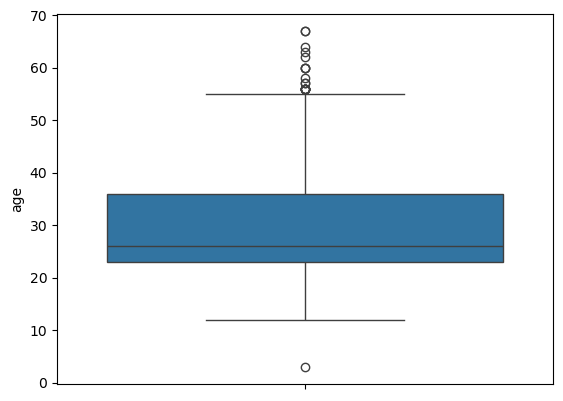

In [242]:
sns.boxplot(y=df['age'])

Como se puede observar en total hay 2  menores a 13 años de edad, procederemos a eliminar estas filas, esto no afectara estadisticamente nuestros datos ya que son solo 2 filas de 600 las que eliminaremos

In [243]:
df = df[df['age'] >= 13]

df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency_2,Rating_Accuracy,Shopping_Satisfaction,id
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,30.868333,2.478333,2.698333,2.670000,2.461667,300.801667
std,10.117556,1.186821,1.043621,0.899508,1.011716,173.749909
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000,150.750000
50%,26.500000,3.000000,3.000000,3.000000,2.000000,300.500000
75%,36.000000,3.000000,3.000000,3.000000,3.000000,451.250000
max,67.000000,5.000000,5.000000,5.000000,5.000000,602.000000


<Axes: ylabel='age'>

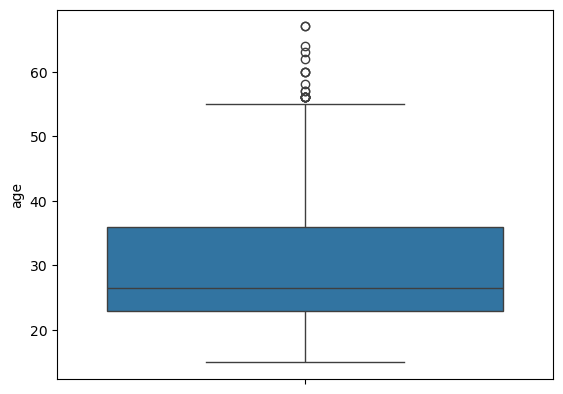

In [244]:
sns.boxplot(y=df['age'])

Como podemos ver, al eliminar a los menores de 13 años, ya no hay valores atípicos por debajo del primer cuartil en nuestro boxplot. Incluso si comparamos la media y la desviación estándar después de eliminar a los menores de edad con los valores originales, prácticamente se mantienen iguales: la media pasa de 30.79 a 30.868, y la desviación estándar de 10.19 a 10.117556, respectivamente.

In [245]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency_2,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,id
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste,1
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,Often,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste,2
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy,3
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,Sometimes,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy,4
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,Sometimes,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy,5


# Análisis de datos

## Análisis variables categóricas

En esta sección analizaremos los datos de las variables categóricas para tener una estadística general lo que se recolectó

La fecha mínima de compra es 2023-06-04 13:28:19-05:30
La fecha máxima de compra es 2023-06-16 09:16:05-05:30
Rango de fechas: 11 days 19:47:46


C:\Users\janto\AppData\Local\Temp\ipykernel_25024\2823520678.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


<Axes: >

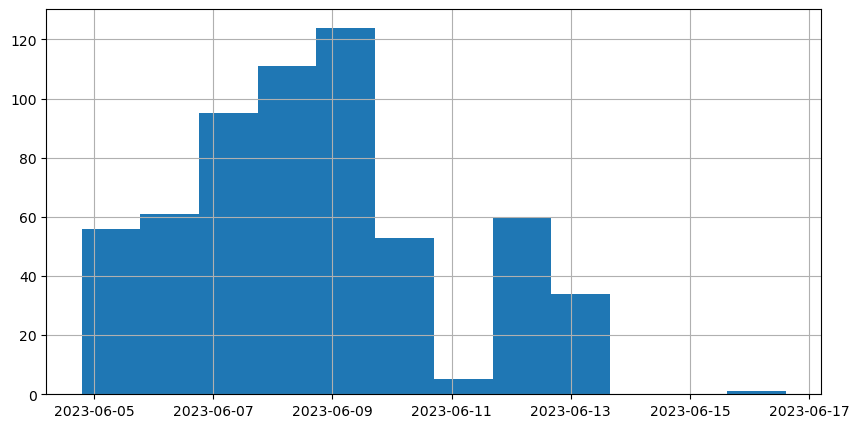

In [246]:
# Obtenemos las fechas del analisis de comportamiento

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
 
fecha_minima = df['Timestamp'].min()
fecha_maxima = df['Timestamp'].max()

print(f'La fecha mínima de compra es {fecha_minima}')
print(f'La fecha máxima de compra es {fecha_maxima}')
print(f'Rango de fechas: {fecha_maxima - fecha_minima}')



df['Timestamp'].hist(bins=12, figsize=(10,5))

La recolección de datos fue hecha aproximadamente en un rango de 11 días

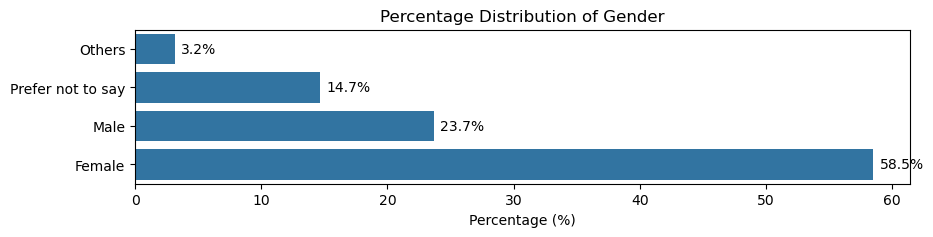

In [247]:
# Distribucion de datos por genero


value_counts = df['Gender'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Percentage Distribution of Gender')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

La mayoria de los datos recolectados de la población fueron mujeres con un 58%

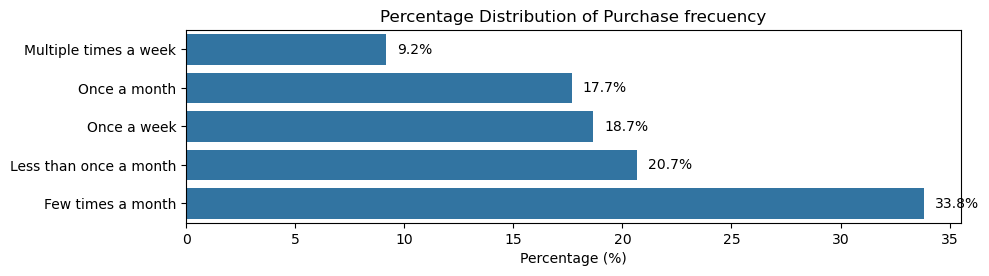

In [248]:
# Frecuencia de compra


value_counts = df['Purchase_Frequency'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Percentage Distribution of Purchase frecuency')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

- La mayoria de los usuarios dice que compra algunas veces al mes siendo un 33.7%
- 20.6% menos de una vez al mes
- 18.6% Una vez a la semana
- 17.8% una vez al mes
- 9.3% multiples veces al la semana

Purchase_Categories
Clothing and Fashion                                                                                106
Beauty and Personal Care                                                                            105
others                                                                                               48
Beauty and Personal Care;Clothing and Fashion                                                        46
Beauty and Personal Care;Clothing and Fashion;Home and Kitchen                                       42
Groceries and Gourmet Food;Beauty and Personal Care;Clothing and Fashion;Home and Kitchen;others     32
Clothing and Fashion;Home and Kitchen                                                                27
Home and Kitchen                                                                                     23
Beauty and Personal Care;Home and Kitchen                                                            21
Clothing and Fashion;Home and Kitchen;others

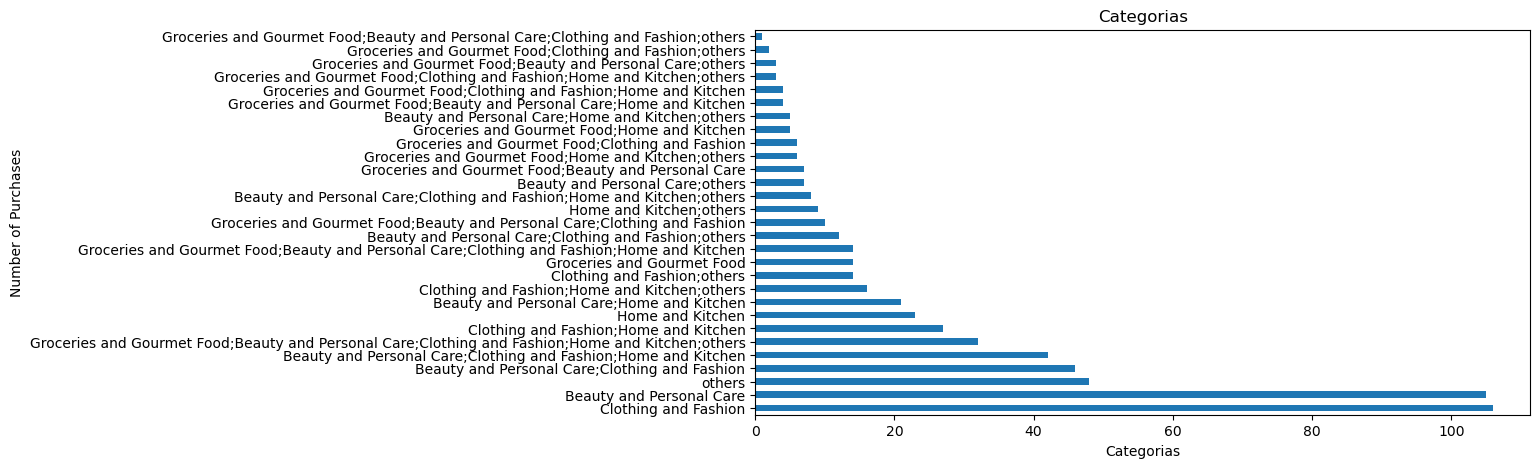

In [ ]:
# Obtenemos las categorias mas populares


purchases_by_category = df['Purchase_Categories'].value_counts()



print(purchases_by_category)


# Plot the bar chart
purchases_by_category.plot(title='Categorias', kind='barh', xlabel='Categorias', ylabel='Number of Purchases', figsize=[10,5])

# mostramos la grafica
plt.show()

Como podemos ver tenemos alrededor de 29 categorías, las cuales reduciremos a las categorías únicas en el siguiente código

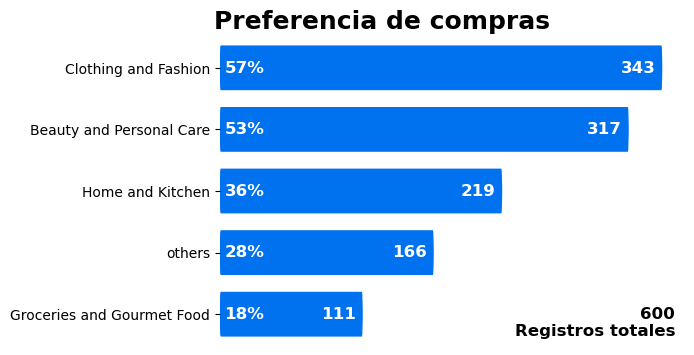

In [250]:
#Categorias unicas
total_registros = len(df)
df_copy = df.copy()
df_copy['Purchase_Categories'] = df_copy['Purchase_Categories'].str.split(';')

df_copy = df_copy.explode('Purchase_Categories').reset_index(drop=True)

from matplotlib.patches import FancyBboxPatch


category_counts = df_copy['Purchase_Categories'].value_counts()

colors_top_five = ['#0072f0', '#0072f0', '#0072f0', '#0072f0', '#0072f0']

title_text: str = 'Preferencia de compras'


plt.figure(figsize=(6, 4))


ax = sns.barplot(
    x=category_counts.values,
    y=category_counts.index, orient='h',
    joinstyle='bevel'
)


new_patches = []
for patch, color, deck, total, in zip(
    ax.patches, colors_top_five,
    category_counts.values, category_counts.values
):

    bb = patch.get_bbox()
    p_bbox = FancyBboxPatch(
        (bb.xmin, bb.ymin), abs(bb.width), abs(bb.height),
        boxstyle='round,pad=-0.05,rounding_size=0.73',
        ec='none', fc=color, mutation_aspect=0.73
    )
    patch.remove()
    new_patches.append(p_bbox)

    ax.annotate(
        f'{(deck*100/total_registros):.0f}%', xy=(40, patch.get_y() + patch.get_height()/2),
        xytext=(-5,0), textcoords='offset points',
        arrowprops=dict(arrowstyle='-', color='none'),
        color='white', fontweight='bold', fontsize=12, ha='right', va='center',
        xycoords='data',
        bbox=dict(facecolor='none', edgecolor='none', pad=0),
        annotation_clip=False
    )

    ax.annotate(
        f'{total}',
        xy=(patch.get_width(), patch.get_y() + patch.get_height()/2),
        xytext=(-5,0), textcoords='offset points',
        arrowprops=dict(arrowstyle='-', color='none'),
        color='white', fontweight='bold', fontsize=12, ha='right', va='center',
        xycoords='data',
        bbox=dict(facecolor='none', edgecolor='none', pad=0),
        annotation_clip=False
    )

for patch in new_patches:
    ax.add_patch(patch)

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.yaxis.grid(False)
ax.xaxis.grid(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(
    title_text,
    fontsize=18, fontweight='bold', x=0.35
)

ax.text(
    0.98, 0.02, f'{total_registros}\nRegistros totales',
    ha='right', va='bottom', transform=ax.transAxes,
    fontsize=12, fontweight='bold'
)

plt.show()

Se puede apreciar que al final solo hay cinco categorias unicas, siendo que el 57% de los usarios prefieren ropa y moda, 53% belleza y cuidado personal, 36% hogar y cocina, 28% otros y comida el 18%

In [251]:
#Combinaciones de categorias unicas por usuario

df_dummies = pd.get_dummies(df_copy['Purchase_Categories'])
df_combined = df_copy.join(df_dummies).groupby('id').max().reset_index()

df_combined.sample(10)

,id,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency_2,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,Beauty and Personal Care,Clothing and Fashion,Groceries and Gourmet Food,Home and Kitchen,others
405,406,2023-06-08 21:17:38-05:30,21,Female,Less than once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,2,Yes,Sometimes,Changed my mind or no longer need the item,Rarely,No,Moderately,Yes,1,Yes,2,2,User-friendly website/app interface,Product quality and accuracy,True,True,False,False,False
364,365,2023-06-08 17:37:58-05:30,34,Female,Few times a month,others,Sometimes,Few times a month,categories,Multiple pages,3,Maybe,Sometimes,Changed my mind or no longer need the item,Often,Yes,Occasionally,No,2,Sometimes,3,3,Product recommendations,Customer service responsiveness,True,True,True,True,True
172,173,2023-06-06 19:40:11-05:30,35,Female,Few times a month,Beauty and Personal Care,No,Few times a month,categories,First page,3,Maybe,Rarely,Found a better price elsewhere,Often,Yes,Occasionally,No,2,No,4,2,Product recommendations,Reducing packaging waste,True,False,False,False,False
431,432,2023-06-09 09:39:04-05:30,32,Female,Once a month,others,Sometimes,Few times a month,others,First page,2,No,Rarely,others,Rarely,Yes,Moderately,No,3,No,3,3,Product recommendations,Customer service responsiveness,False,False,False,False,True
5,6,2023-06-04 18:01:59-05:30,21,Female,Less than once a month,Clothing and Fashion,No,Rarely,categories,Multiple pages,1,Yes,Rarely,Changed my mind or no longer need the item,Never,No,Heavily,Yes,5,No,5,2,Wide product selection,Product quality and accuracy,False,True,False,False,False
440,441,2023-06-09 10:26:51-05:30,34,Female,Few times a month,others,No,Few times a month,categories,First page,2,Maybe,Sometimes,Changed my mind or no longer need the item,Often,No,Occasionally,No,1,No,3,1,Competitive prices,Customer service responsiveness,False,False,False,False,True
379,380,2023-06-08 17:48:14-05:30,20,Prefer not to say,Multiple times a week,others,Sometimes,Multiple times a day,categories,First page,3,Yes,Often,Found a better price elsewhere,Often,Yes,Moderately,No,4,No,2,2,Product recommendations,Product quality and accuracy,True,True,False,True,True
130,131,2023-06-06 18:36:16-05:30,29,Prefer not to say,Once a week,Beauty and Personal Care,Yes,Few times a week,categories,Multiple pages,1,No,Sometimes,Found a better price elsewhere,Sometimes,Yes,Occasionally,No,3,No,2,1,Competitive prices,Customer service responsiveness,True,False,False,False,False
128,129,2023-06-06 18:35:14-05:30,26,Male,Less than once a month,others,Yes,Few times a week,Keyword,Multiple pages,1,Yes,Often,Found a better price elsewhere,Sometimes,No,Heavily,Yes,1,Yes,2,1,Wide product selection,Customer service responsiveness,True,True,True,True,True
456,458,2023-06-09 14:39:47-05:30,34,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,2,Maybe,Sometimes,Changed my mind or no longer need the item,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,3,2,Product recommendations,Customer service responsiveness,True,False,False,False,False


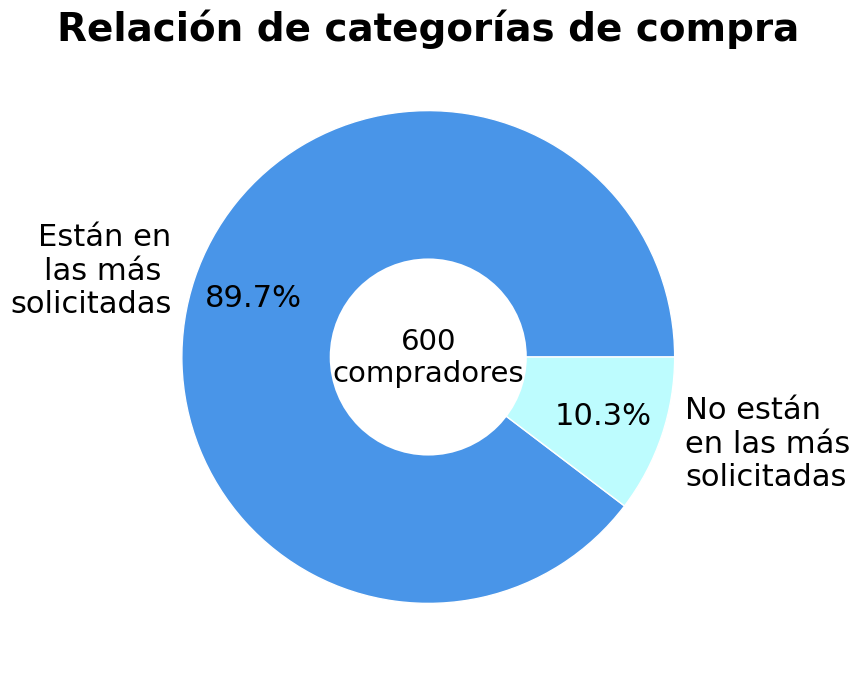

In [252]:
"""
Armado del dataset para hacer la gráfica de venn
Calcular cuanto están en común y cuantos solo una categoría
"""

from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib_venn import venn3


df_filtered = df_combined[['id'] + df_combined.columns[-5:].tolist()]
def comunidad(server: str, df: pd.DataFrame=df_filtered):
    '''
        Para filtrar sus usuarios únicos de cada comunidad
    '''
    return df.query(f'`{server}` == True')['id'].drop_duplicates()


comunidad_list_top_three = category_counts.index[:3].tolist()


comunity_top_one = comunidad(comunidad_list_top_three[0])
comunity_top_two = comunidad(comunidad_list_top_three[1])
comunity_top_three = comunidad(comunidad_list_top_three[2])

set_top_one = set(comunity_top_one)
set_top_two = set(comunity_top_two)
set_top_three = set(comunity_top_three)

# Calcular los tamaños de los conjuntos
size_100 = len(set_top_one - (set_top_two | set_top_three))
size_010 = len(set_top_two - (set_top_one | set_top_three))
size_001 = len(set_top_three - (set_top_one | set_top_two))
size_110 = len((set_top_one & set_top_two) - set_top_three)
size_101 = len((set_top_one & set_top_three) - set_top_two)
size_011 = len((set_top_two & set_top_three) - set_top_one)
size_111 = len(set_top_one & set_top_two & set_top_three)

# Calcular los porcentajes
total = sum(
    [size_100, size_010, size_001, size_110, size_101, size_011, size_111]
)

percent_100 = (size_100 / total_registros) * 100
percent_010 = (size_010 / total_registros) * 100
percent_001 = (size_001 / total_registros) * 100
percent_110 = (size_110 / total_registros) * 100
percent_101 = (size_101 / total_registros) * 100
percent_011 = (size_011 / total_registros) * 100
percent_111 = (size_111 / total_registros) * 100

ids_sum: int = int(df_filtered.id.drop_duplicates().count())

count_com = [total, int(ids_sum - total)]
labels_com = "Están en\nlas más \nsolicitadas", "No están\nen las más\nsolicitadas"
pastel_colors = ['#4995e8', '#BDFCFE']

title_text: str = "Relación de categorías de compra"

fig, ax = plt.subplots(figsize=(10, 8))

wedges, texts, autotexts = ax.pie(
    count_com, labels=labels_com, autopct="%1.1f%%",
    colors=pastel_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'linestyle': 'solid'},
    pctdistance=0.75,
    textprops={'fontsize': 22}
)

centre_circle = plt.Circle((0, 0), 0.4, fc='white')
ax.add_artist(centre_circle)

ax.text(0, 0, f'{ids_sum}\ncompradores', ha='center', va='center', fontsize=21)

ax.set_title(
    title_text,
    fontsize=28,
    fontweight="bold"
)

plt.show()

Entre las categorías `Clothing and Fashion`, `Beauty and Personal Care`, `Home and Kitchen` hay una gran preferencia por los encuestados, prácticamente un 90% de ellos

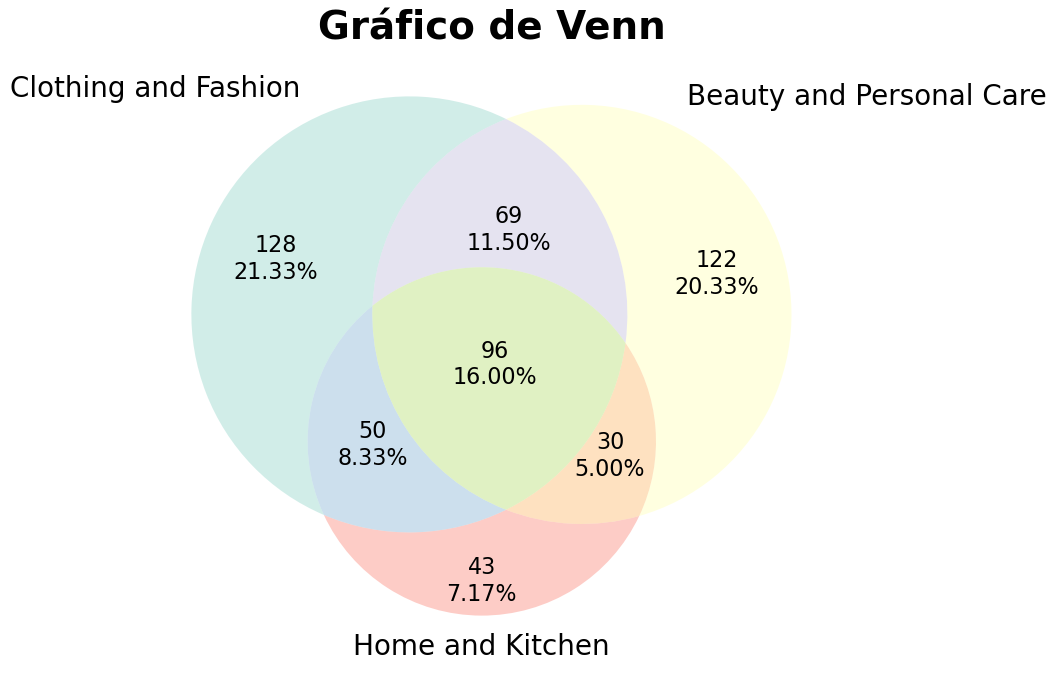

In [253]:

# Gráfico de Venn en sí


fig, ax = plt.subplots(figsize=(10, 8))

venn = venn3(
    [set_top_one, set_top_two, set_top_three],
    set_labels=(
        comunidad_list_top_three[0],
        comunidad_list_top_three[1],
        comunidad_list_top_three[2]
    )
)

venn.get_label_by_id('100').set_text(
    f"{size_100}\n{percent_100:.2f}%")
venn.get_label_by_id('010').set_text(
    f"{size_010}\n{percent_010:.2f}%")
venn.get_label_by_id('001').set_text(
    f"{size_001}\n{percent_001:.2f}%")
venn.get_label_by_id('110').set_text(
    f"{size_110}\n{percent_110:.2f}%")
venn.get_label_by_id('101').set_text(
    f"{size_101}\n{percent_101:.2f}%")
venn.get_label_by_id('011').set_text(
    f"{size_011}\n{percent_011:.2f}%")
venn.get_label_by_id('111').set_text(
    f"{size_111}\n{percent_111:.2f}%")


colors = sns.color_palette('Set3', 7)
for patch, color in zip(venn.patches, colors):
    patch.set_facecolor(color)


for label in venn.set_labels:
    label.set_fontsize(20)

for label in venn.subset_labels:
    if label:
        label.set_fontsize(16)

ax.set_title(
    'Gráfico de Venn',
    fontsize=28,
    fontweight="bold"
)

plt.show()

A partir del mismo, podemos ver que el 16% de los encuestados son los que eligen las 3 categorías en concreto, solo detrás de los que eligen solo `Clothing and Fashion` o `Beauty and Personal Care`

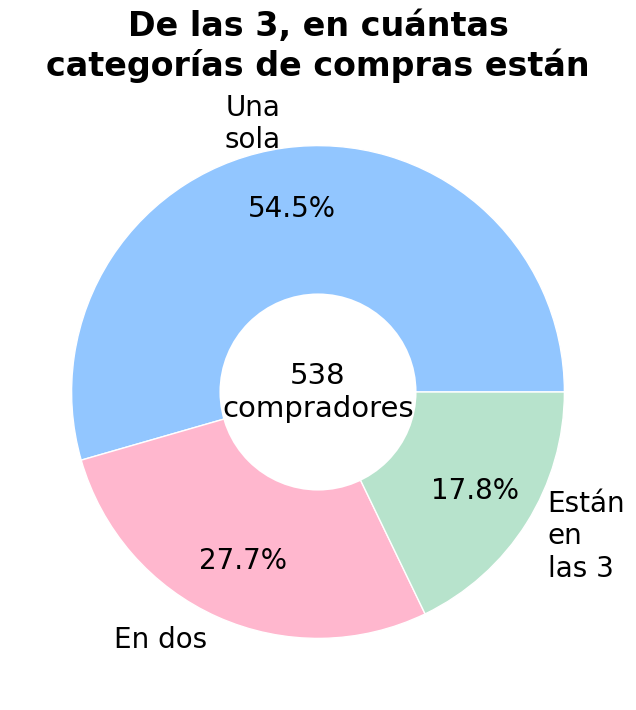

In [254]:

# A partir de las 3 categorías principales
# Muestra gráfica de cuantos son que eligieron 1 de esos 3,
# cuantos eligieron 2 y cuantos eligieron los 3

fig, ax = plt.subplots(figsize=(10, 8))


unique_server = size_100 + size_010 + size_001
two_communities = size_110 + size_101 + size_011

count_duelists = [unique_server, two_communities, size_111]
labels = "Una\nsola", "En dos", "Están\nen\nlas 3"
pastel_colors = ['#92c6ff', '#ffb7ce', '#b7e3cc']


wedges, texts, autotexts = ax.pie(
    count_duelists, labels=labels, autopct="%1.1f%%",
    colors=pastel_colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1, 'linestyle': 'solid'},
    pctdistance=0.75,
    textprops={'fontsize': 20}
)

centre_circle = plt.Circle((0, 0), 0.4, fc='white')
ax.add_artist(centre_circle)

ax.text(0, 0, f'{total}\ncompradores', ha='center', va='center', fontsize=21)

ax.set_title(
    'De las 3, en cuántas\ncategorías de compras están',
    fontsize=24,
    fontweight="bold"
)


plt.show()

Comparando solo las categorías más solicitadas vemos que 293 encuestados son los que eligen solamente uno de las tres.

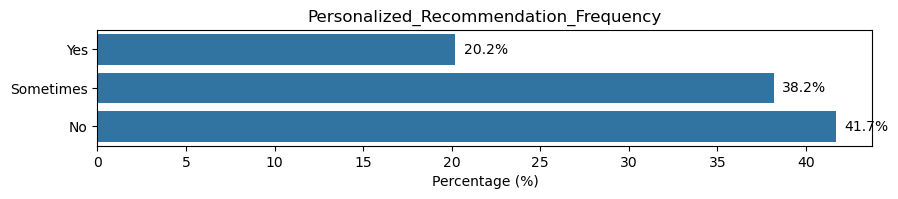

In [255]:
# Dsitribucions de frecuencia si los usarios han hecho alguna compra basado en los recomendaciones de amazon

value_counts = df['Personalized_Recommendation_Frequency'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Personalized_Recommendation_Frequency')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

El 20.3% dice que si ha hecho compras basado en las recomendaciones de amazon, 38% de los usuarios dicen que a veces y 41.7% dice que no 

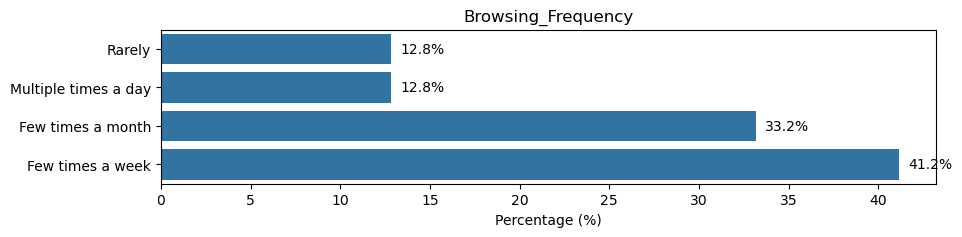

In [256]:
#Frecuencia de navegacion


value_counts = df['Browsing_Frequency'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Browsing_Frequency')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

La mayoría de los usuarios dice que navega algunas veces por semana, siendo un 41.4%, el 33.1% dice que navega algunas veces por mes, el 12.8% dice que navega múltiples veces en el día, y también el 12.8% dice que raramente.

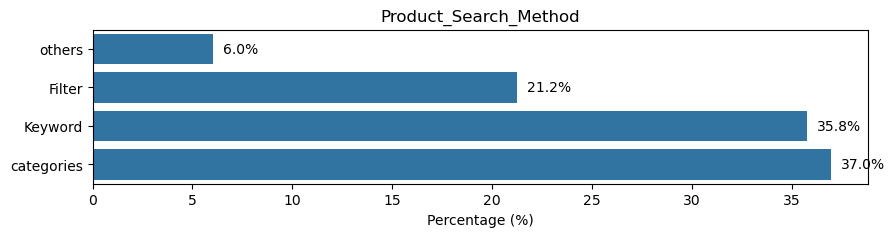

In [257]:
# Como buscas los productos?

value_counts = df['Product_Search_Method'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Product_Search_Method')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

El 37.2% de los usuarios dijo que su método de búsqueda era por categorías, el 35.7% dijo que era por palabras clave, el 21.2% dijo que era por filtros, y el 6% dijo otros.

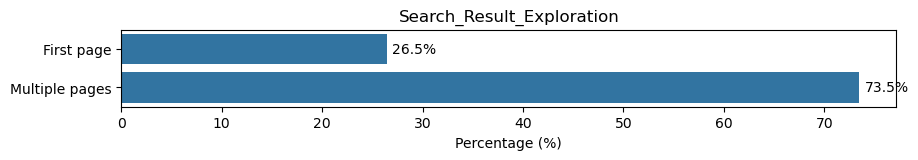

In [258]:
#Busqueda en primera pagina o multiples paginas


value_counts = df['Search_Result_Exploration'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Search_Result_Exploration')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

73.4% de los usuarios dijo que tiende a navegar en múltiples páginas, mientras que el 26.6% dijo que se enfoca en la primera página

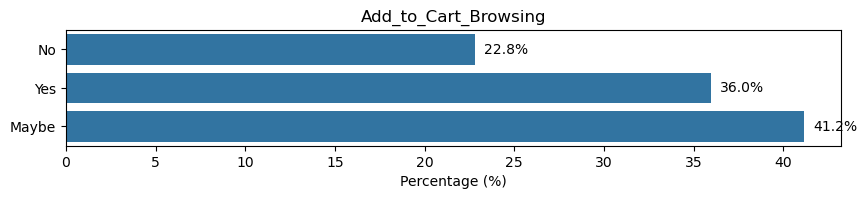

In [259]:
# Agregas al carrito mientras naveghas

value_counts = df['Add_to_Cart_Browsing'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Add_to_Cart_Browsing')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

41.2% de usuarios dijo que tal vez agregaba al carrito mientras navegaba,  35.9% dijo que sí y 22.9% dijo que no

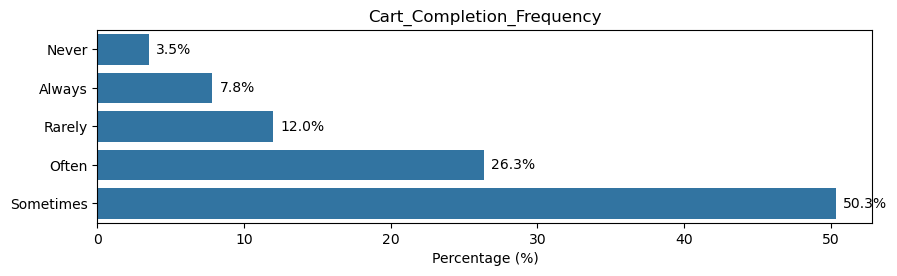

In [260]:
# Que tan seguido se completa la compra despues de agregar ala carrito


value_counts = df['Cart_Completion_Frequency'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Cart_Completion_Frequency')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

- 50.3% de los usarios dijeron que aq veces completaban el carrito
- 26.3 que siempre lo completaban
- 12% rara vez completaban el carrito
- 7.8% siempre completaban el carrito
- 3.5% nunca completaban el carrito

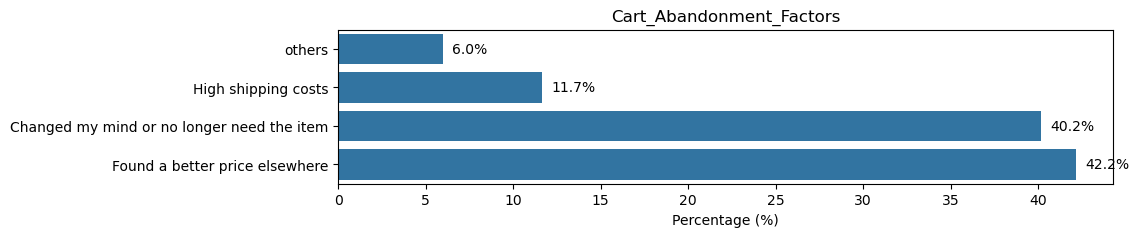

In [261]:
# Frecuencia de distribucion categorias abandono de carrito
value_counts = df['Cart_Abandonment_Factors'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Cart_Abandonment_Factors')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Prácticamente aquí podemos ver que los factores de abandono de carrito que más sobresalen son 'Se encontró un mejor precio en otro lugar' con un 42.2%, 'Se cambió de opinión o ya no se necesita el producto' con un 40.2%, y después con 11.7% y 6.0% están 'Altos costos de envío' y 'otros', respectivamente

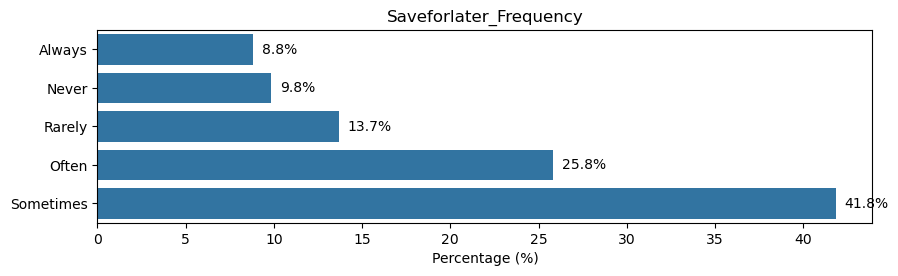

In [262]:
# Frecuencia del uso de funcion save for later

value_counts = df['Saveforlater_Frequency'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Saveforlater_Frequency')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Respecto al uso de la funcion 'Guardar para mas tarde'

- 41.8% de los usuarios dijo que a veces la utilizaba
- 25.8% dijp que la utilizaba seguido
- 13.7% de los usuarios dijo que raramente la utilizaba
- 9.8% de los usuarios dijo que nunca la utilizaba
- 8..8% de los usuarios dijo que siempre la utilizaba

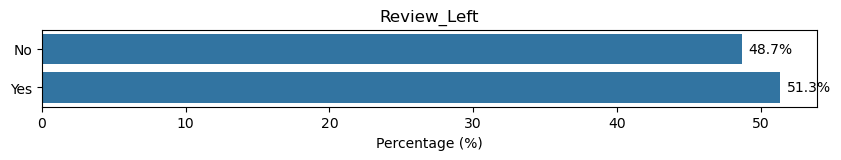

In [263]:
# Resena hecha

value_counts = df['Review_Left'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Review_Left')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Practicamente mitad y mitad dejan o no resena siendo un 48.7% que no y 51.3% que si

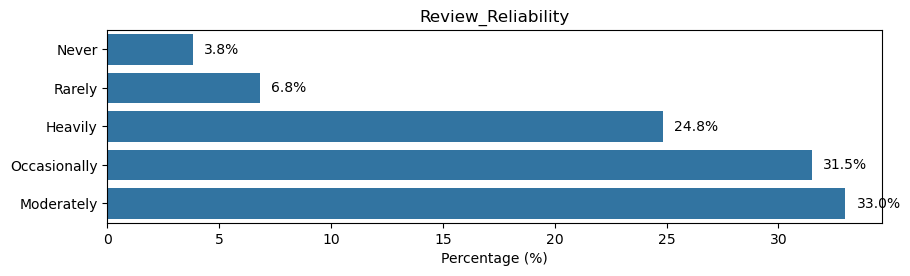

In [264]:
# Confianza en las resenas al hacer compra



value_counts = df['Review_Reliability'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Review_Reliability')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Aquí se le preguntó al usuario qué tanto confía en las reseñas de los productos, para lo cual:

- 33% dijo que confía moderadamente.

- 31.5% dijo que ocasionalmente confía en las reseñas.

- 24.8% dijo que confía fuertemente.

- 6.8% raramente confiaba en las reseñas.

- 3.8% nunca confiaba en las reseñas.

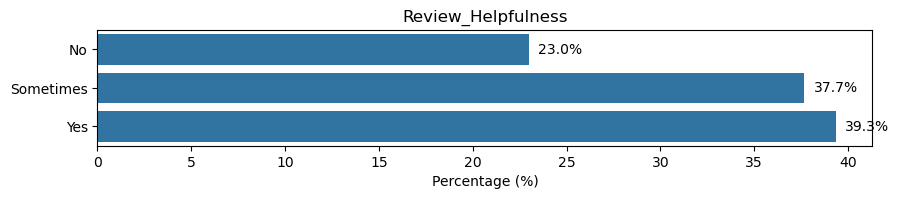

In [265]:
# Las resenas de otros clientes son utiles?


value_counts = df['Review_Helpfulness'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Review_Helpfulness')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

En esta grafica se ve que el 39.3% de los clientes considera util las resenas, 37.7% dijo que a veces las considera utiles y el 23% dijo que no las considera utiles

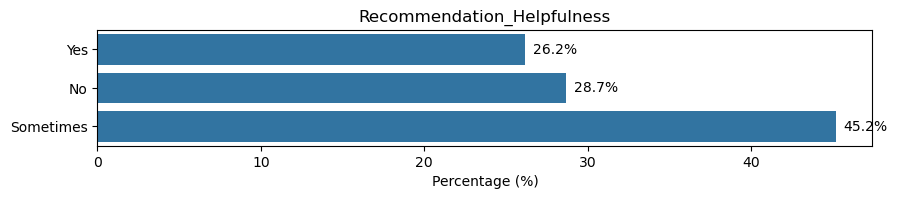

In [266]:
# Recomendaciones utiles



value_counts = df['Recommendation_Helpfulness'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Recommendation_Helpfulness')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Los usarios que consideraron que las rcomendaciones a veces eran utiles fue de un 45.2%, los que dijeron que no eran utiles fue de un 28.7% y los que dijeron que si eran utiles fue de un 26.2%

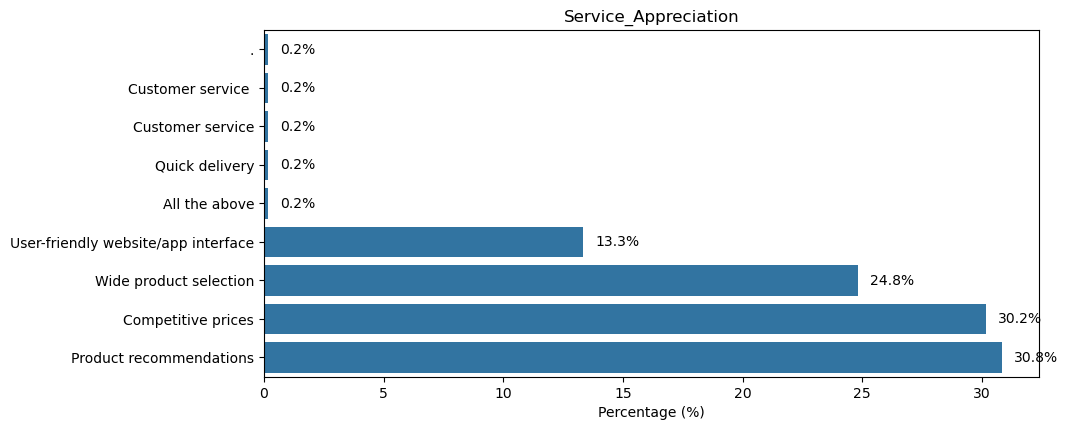

In [267]:
# Aspectos de servicio que mas se valoran


value_counts = df['Service_Appreciation'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Service_Appreciation')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Dentro de los aspectos de servicio que más destacaban los usuarios fueron:

- Recomendaciones de productos con un 30.8%.

- Precios competitivos con un 30.2%.

- Variedad de productos con un 24.8%.

- Interfaz amigable de la aplicación con un 13.3%.

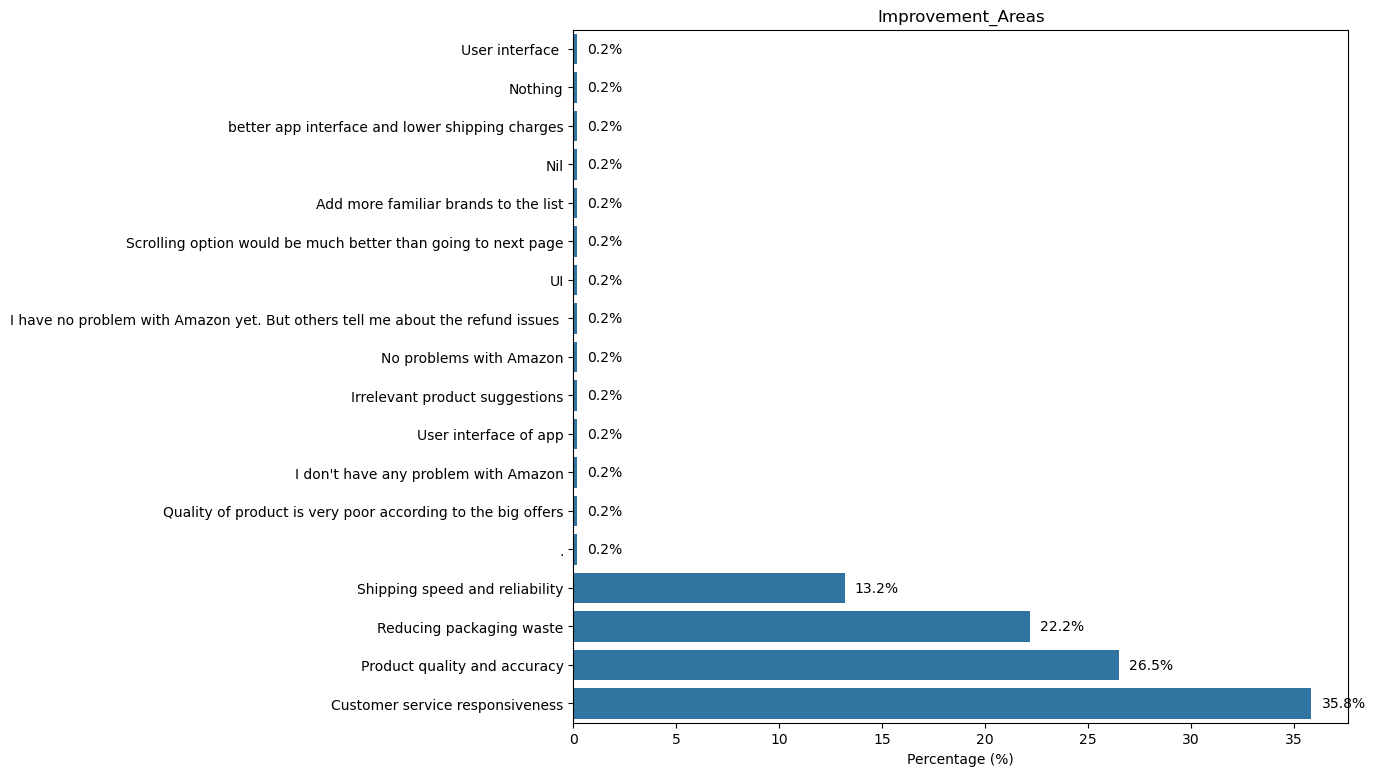

In [268]:
# Areas a mejorar


value_counts = df['Improvement_Areas'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Improvement_Areas')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      
        
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

Dentro de las principales áreas a mejorar según los usuarios fueron:

- 35.8% dijo que la respuesta de servicio al cliente.

- 26.5% la calidad del producto.

- 22.2% reducción de los residuos de empaque.

- 13.2% rapidez y confianza de envío.

### Análisis prueba chi cuadrada para independencia variables vs factores de abandono de carrito

Para el analisis de las variables categoricas y su relacion con los factores de abandono de carrito se realizara una prueba chi cuadrada para independencia para ver si hay algun tipo de relacion


Analisis 'Gender' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Gender                                                                 
Female                                                           137   
Male                                                              61   
Others                                                             8   
Prefer not to say                                                 35   

Cart_Abandonment_Factors  Found a better price elsewhere  High shipping costs  \
Gender                                                                          
Female                                               149                   49   
Male                                                  59                    9   
Others                                                 6                    3   
Prefer not to say                                     39                    9   

Cart_A

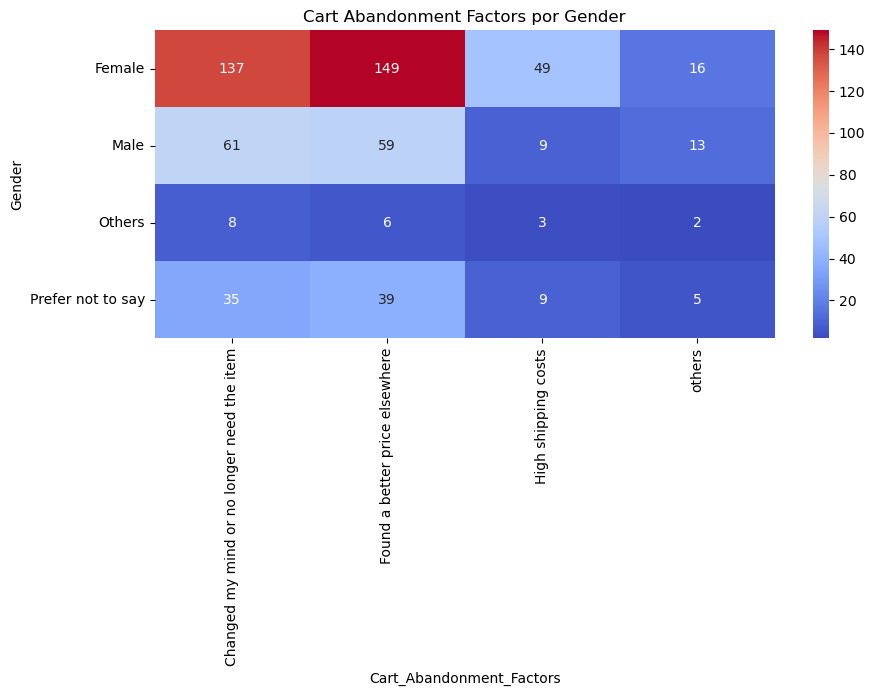

Chi-Square Statistic: 10.737082784874403
p-value: 0.2941619794001711
Degrees of Freedom: 9
Expected Frequencies Table:
[[140.985      148.005       40.95        21.06      ]
 [ 57.03666667  59.87666667  16.56666667   8.52      ]
 [  7.63166667   8.01166667   2.21666667   1.14      ]
 [ 35.34666667  37.10666667  10.26666667   5.28      ]]

Conclusion: Como p_value  (0.2942) es mayor a alpha de 0.05, no hay suficiente evidencia para rechazar  H0(hipotesis nula)

Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre Gender y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Purchase_Frequency' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Purchase_Frequency                                                     
Few times a month                                                 86 

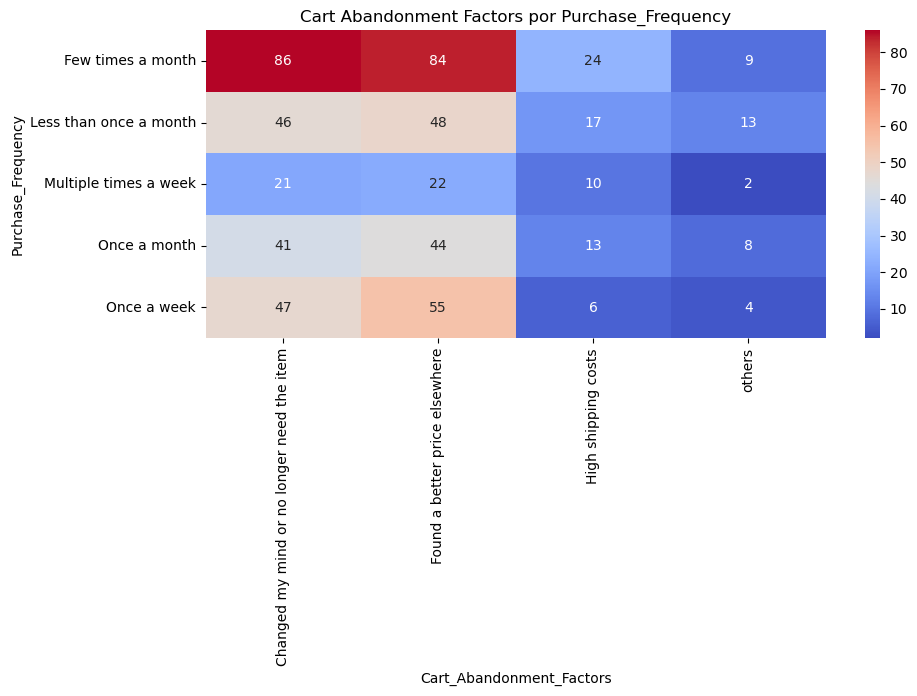

Chi-Square Statistic: 15.794757931718022
p-value: 0.20081841054013
Degrees of Freedom: 12
Expected Frequencies Table:
[[81.53833333 85.59833333 23.68333333 12.18      ]
 [49.80666667 52.28666667 14.46666667  7.44      ]
 [22.09166667 23.19166667  6.41666667  3.3       ]
 [42.57666667 44.69666667 12.36666667  6.36      ]
 [44.98666667 47.22666667 13.06666667  6.72      ]]

Conclusion: Como p_value  (0.2008) es mayor a alpha de 0.05, no hay suficiente evidencia para rechazar  H0(hipotesis nula)

Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre Purchase_Frequency y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Personalized_Recommendation_Frequency' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors               Changed my mind or no longer need the item  \
Personalized_Recommendation_Frequency                          

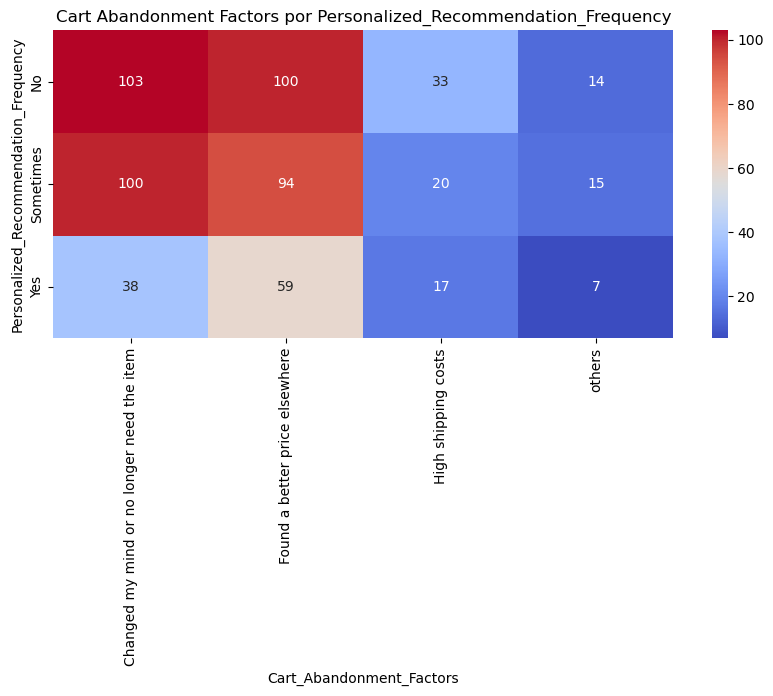

Chi-Square Statistic: 7.6447424642999415
p-value: 0.2653024629282771
Degrees of Freedom: 6
Expected Frequencies Table:
[[100.41666667 105.41666667  29.16666667  15.        ]
 [ 91.98166667  96.56166667  26.71666667  13.74      ]
 [ 48.60166667  51.02166667  14.11666667   7.26      ]]

Conclusion: Como p_value  (0.2653) es mayor a alpha de 0.05, no hay suficiente evidencia para rechazar  H0(hipotesis nula)

Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre Personalized_Recommendation_Frequency y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Browsing_Frequency' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Browsing_Frequency                                                     
Few times a month                                                 90   
Few times a week     

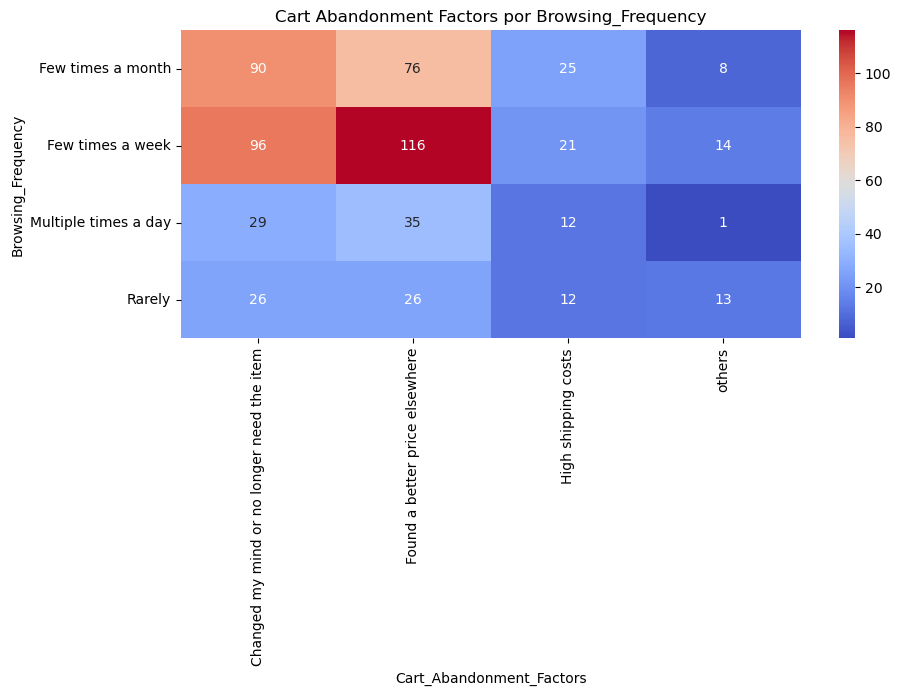

Chi-Square Statistic: 29.52295649279776
p-value: 0.000528678224286799
Degrees of Freedom: 9
Expected Frequencies Table:
[[ 79.93166667  83.91166667  23.21666667  11.94      ]
 [ 99.21166667 104.15166667  28.81666667  14.82      ]
 [ 30.92833333  32.46833333   8.98333333   4.62      ]
 [ 30.92833333  32.46833333   8.98333333   4.62      ]]

Conclusion: Como p_value (0.0005) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Browsing_Frequency y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Product_Search_Method' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Product_Search_Method                                                  
Filter                                                            56   
Keyword          

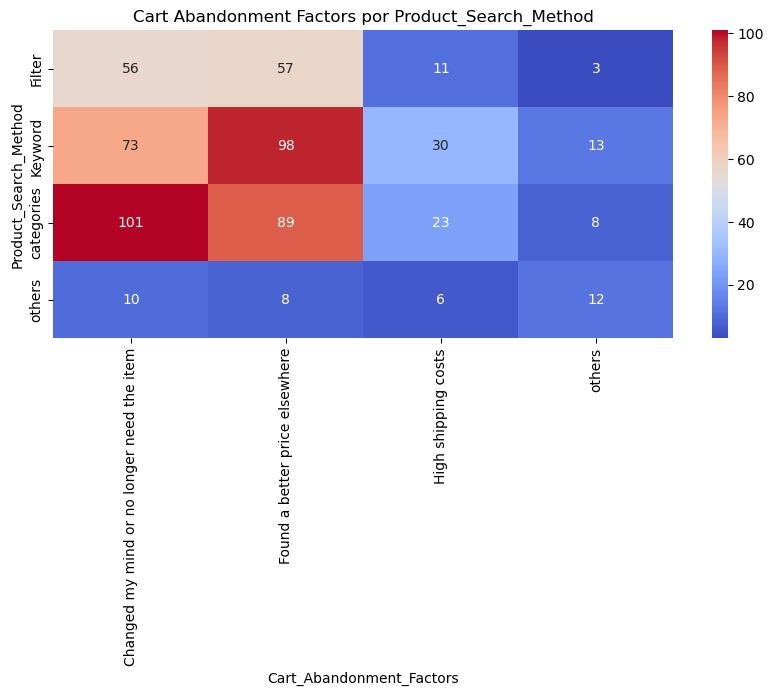

Chi-Square Statistic: 62.59213544272774
p-value: 4.2319931587143415e-10
Degrees of Freedom: 9
Expected Frequencies Table:
[[50.96989967 53.51839465 14.86622074  7.64548495]
 [85.88628763 90.18060201 25.05016722 12.88294314]
 [88.69565217 93.13043478 25.86956522 13.30434783]
 [14.44816054 15.17056856  4.21404682  2.16722408]]

Conclusion: Como p_value (0.0000) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Product_Search_Method y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Search_Result_Exploration' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors   Changed my mind or no longer need the item  \
Search_Result_Exploration                                               
First page                                                         74   
Multiple pages       

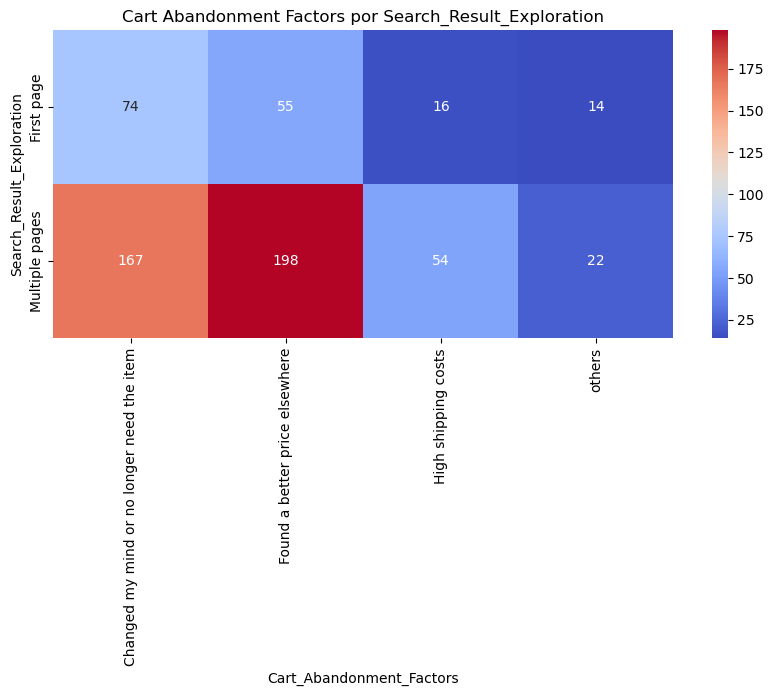

Chi-Square Statistic: 8.446159630150426
p-value: 0.037637061070788694
Degrees of Freedom: 3
Expected Frequencies Table:
[[ 63.865  67.045  18.55    9.54 ]
 [177.135 185.955  51.45   26.46 ]]

Conclusion: Como p_value (0.0376) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Search_Result_Exploration y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Add_to_Cart_Browsing' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Add_to_Cart_Browsing                                                   
Maybe                                                            109   
No                                                                59   
Yes                                                               73   

Cart_Abandonment

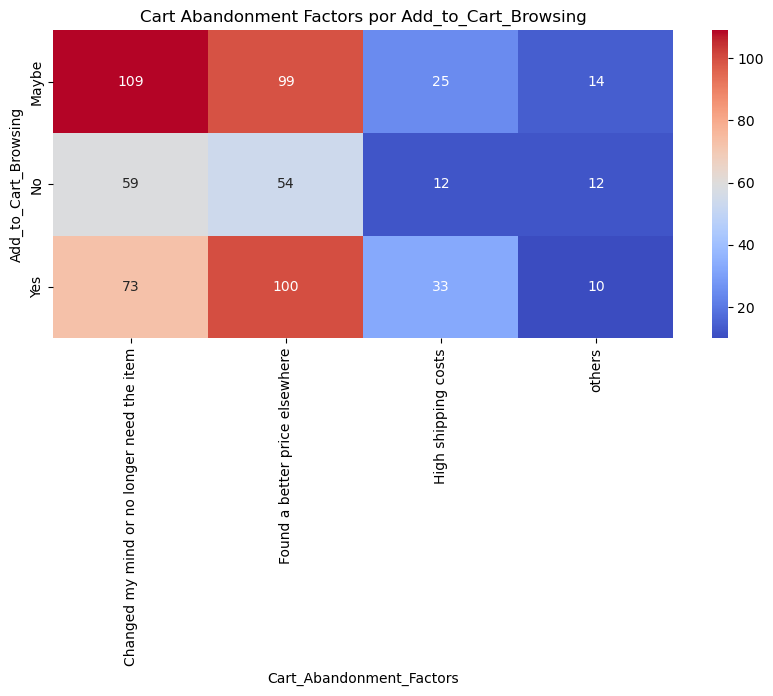

Chi-Square Statistic: 11.18109453436253
p-value: 0.08293816488221954
Degrees of Freedom: 6
Expected Frequencies Table:
[[ 99.21166667 104.15166667  28.81666667  14.82      ]
 [ 55.02833333  57.76833333  15.98333333   8.22      ]
 [ 86.76        91.08        25.2         12.96      ]]

Conclusion: Como p_value  (0.0829) es mayor a alpha de 0.05, no hay suficiente evidencia para rechazar  H0(hipotesis nula)

Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre Add_to_Cart_Browsing y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Cart_Completion_Frequency' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors   Changed my mind or no longer need the item  \
Cart_Completion_Frequency                                               
Always                                                             17   
Never                       

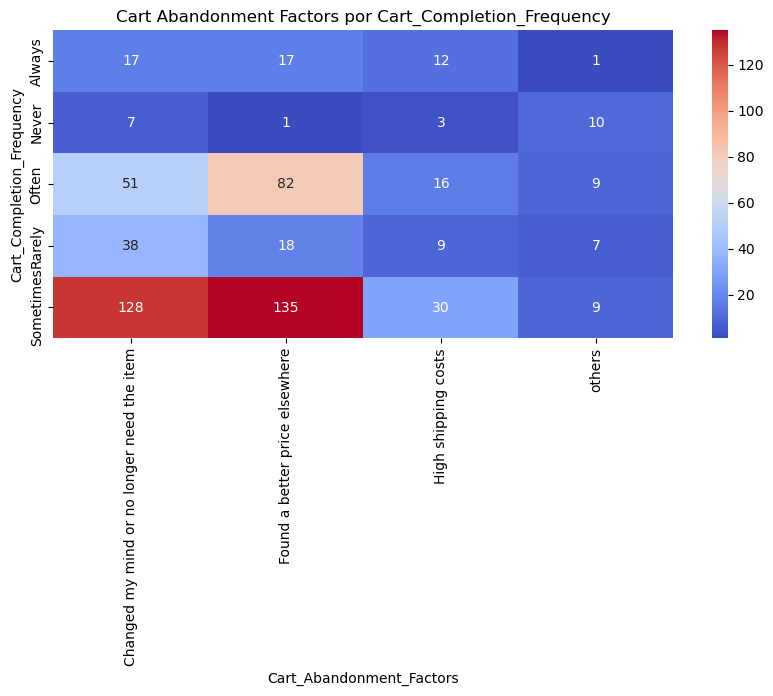

Chi-Square Statistic: 99.59552980169615
p-value: 6.681839479542887e-16
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 18.87833333  19.81833333   5.48333333   2.82      ]
 [  8.435        8.855        2.45         1.26      ]
 [ 63.46333333  66.62333333  18.43333333   9.48      ]
 [ 28.92        30.36         8.4          4.32      ]
 [121.30333333 127.34333333  35.23333333  18.12      ]]

Conclusion: Como p_value (0.0000) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Cart_Completion_Frequency y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Saveforlater_Frequency' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Saveforlater_Frequency                                                 
Always                  

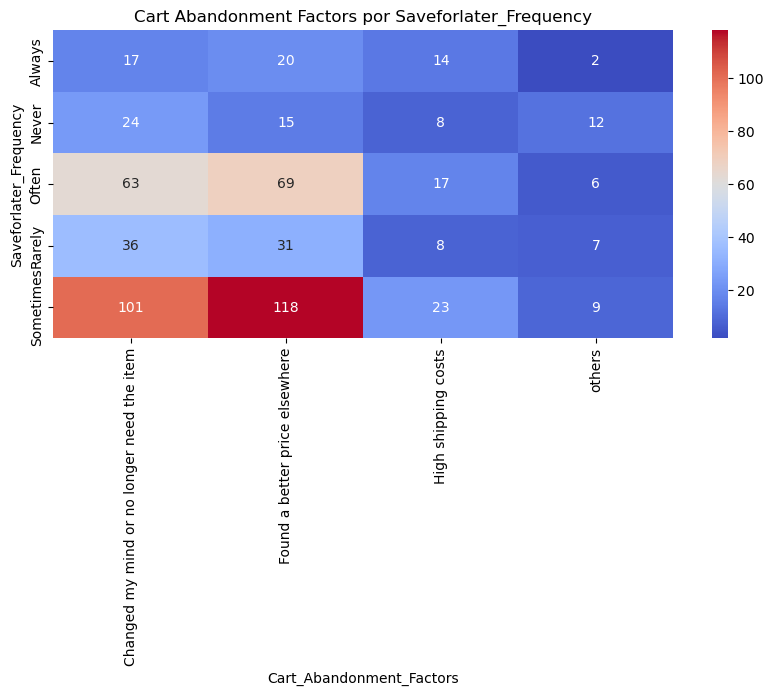

Chi-Square Statistic: 44.178132298783915
p-value: 1.4240474330876047e-05
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 21.28833333  22.34833333   6.18333333   3.18      ]
 [ 23.69833333  24.87833333   6.88333333   3.54      ]
 [ 62.25833333  65.35833333  18.08333333   9.3       ]
 [ 32.93666667  34.57666667   9.56666667   4.92      ]
 [100.81833333 105.83833333  29.28333333  15.06      ]]

Conclusion: Como p_value (0.0000) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Saveforlater_Frequency y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Review_Left' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Review_Left                                                            
No                                  

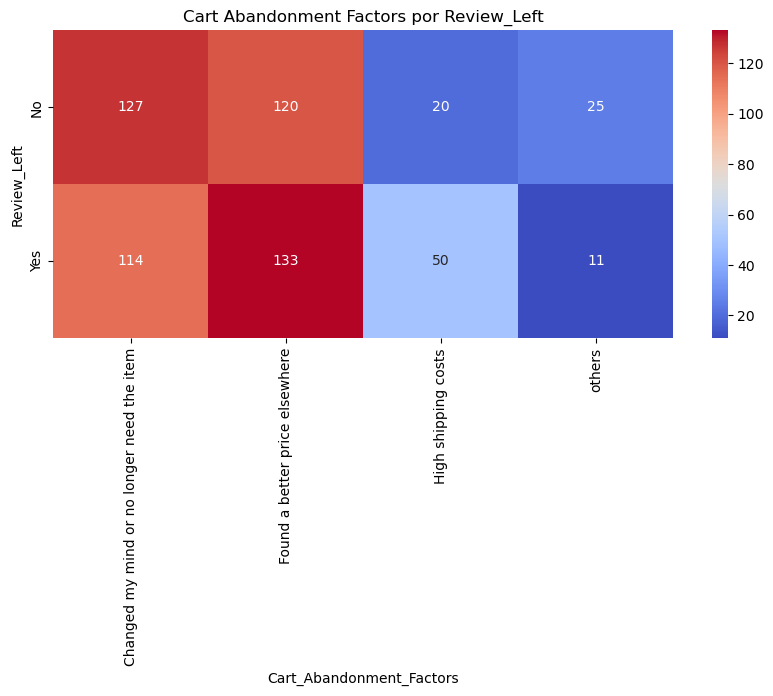

Chi-Square Statistic: 19.25784410484097
p-value: 0.0002418060715484249
Degrees of Freedom: 3
Expected Frequencies Table:
[[117.28666667 123.12666667  34.06666667  17.52      ]
 [123.71333333 129.87333333  35.93333333  18.48      ]]

Conclusion: Como p_value (0.0002) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Review_Left y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Review_Reliability' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Review_Reliability                                                     
Heavily                                                           49   
Moderately                                                        82   
Never                                                           

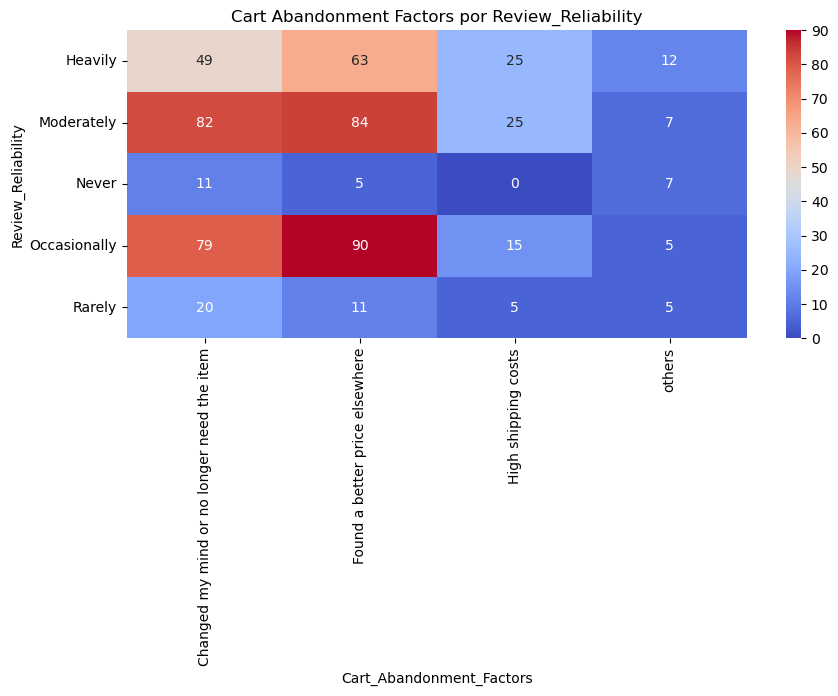

Chi-Square Statistic: 49.70845489006796
p-value: 1.5718508348049611e-06
Degrees of Freedom: 12
Expected Frequencies Table:
[[59.84833333 62.82833333 17.38333333  8.94      ]
 [79.53       83.49       23.1        11.88      ]
 [ 9.23833333  9.69833333  2.68333333  1.38      ]
 [75.915      79.695      22.05       11.34      ]
 [16.46833333 17.28833333  4.78333333  2.46      ]]

Conclusion: Como p_value (0.0000) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Review_Reliability y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Review_Helpfulness' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors  Changed my mind or no longer need the item  \
Review_Helpfulness                                                     
No                                                    

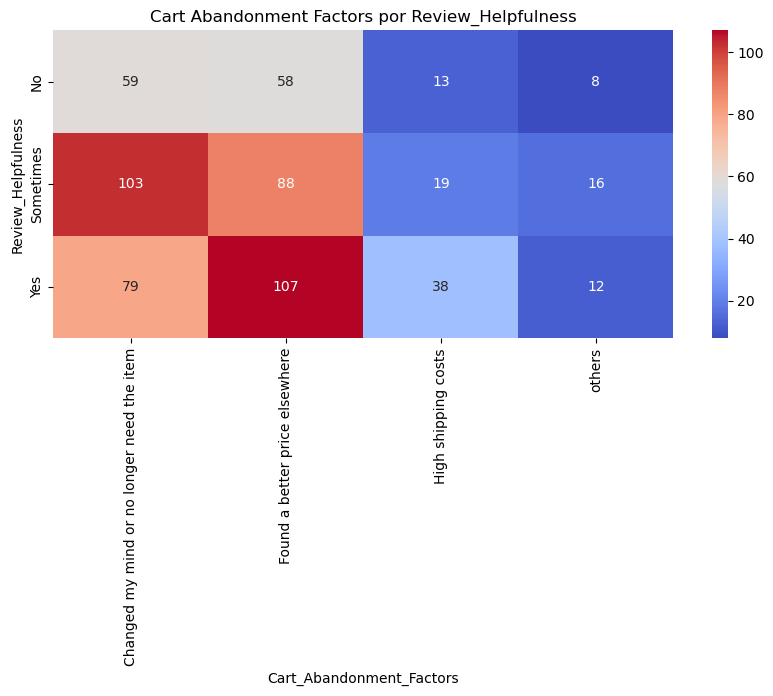

Chi-Square Statistic: 13.041645319676066
p-value: 0.042379362218463675
Degrees of Freedom: 6
Expected Frequencies Table:
[[55.43       58.19       16.1         8.28      ]
 [90.77666667 95.29666667 26.36666667 13.56      ]
 [94.79333333 99.51333333 27.53333333 14.16      ]]

Conclusion: Como p_value (0.0424) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Review_Helpfulness y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Recommendation_Helpfulness' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors    Changed my mind or no longer need the item  \
Recommendation_Helpfulness                                               
No                                                                  78   
Sometimes                                                          115  

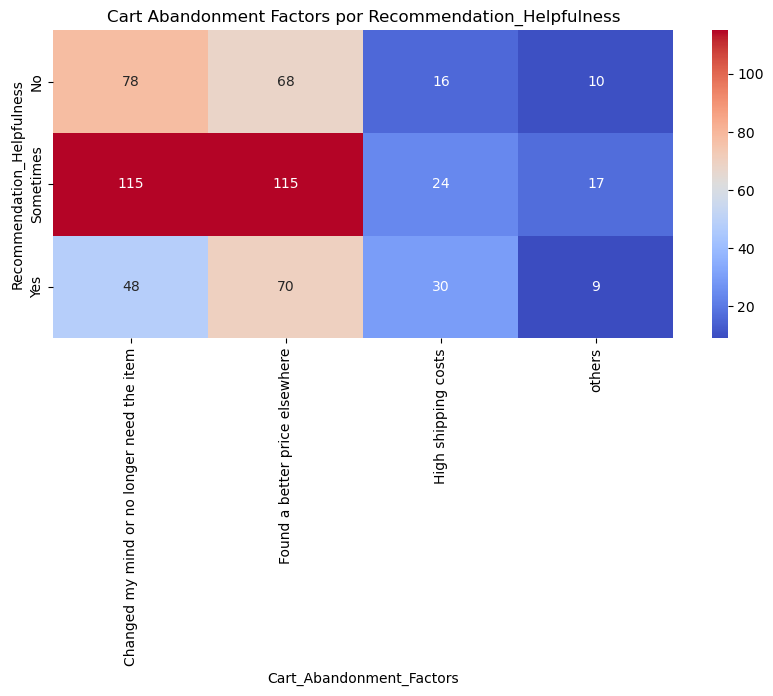

Chi-Square Statistic: 15.77329897685922
p-value: 0.01502389486843498
Degrees of Freedom: 6
Expected Frequencies Table:
[[ 69.08666667  72.52666667  20.06666667  10.32      ]
 [108.85166667 114.27166667  31.61666667  16.26      ]
 [ 63.06166667  66.20166667  18.31666667   9.42      ]]

Conclusion: Como p_value (0.0150) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Recommendation_Helpfulness y  Cart_Abandonment_Factors
--------------------------------------------------

Analisis 'Service_Appreciation' vs 'Cart_Abandonment_Factors':
Cross-Tabulation Table:
Cart_Abandonment_Factors             Changed my mind or no longer need the item  \
Service_Appreciation                                                              
.                                                                             0   
All the above                    

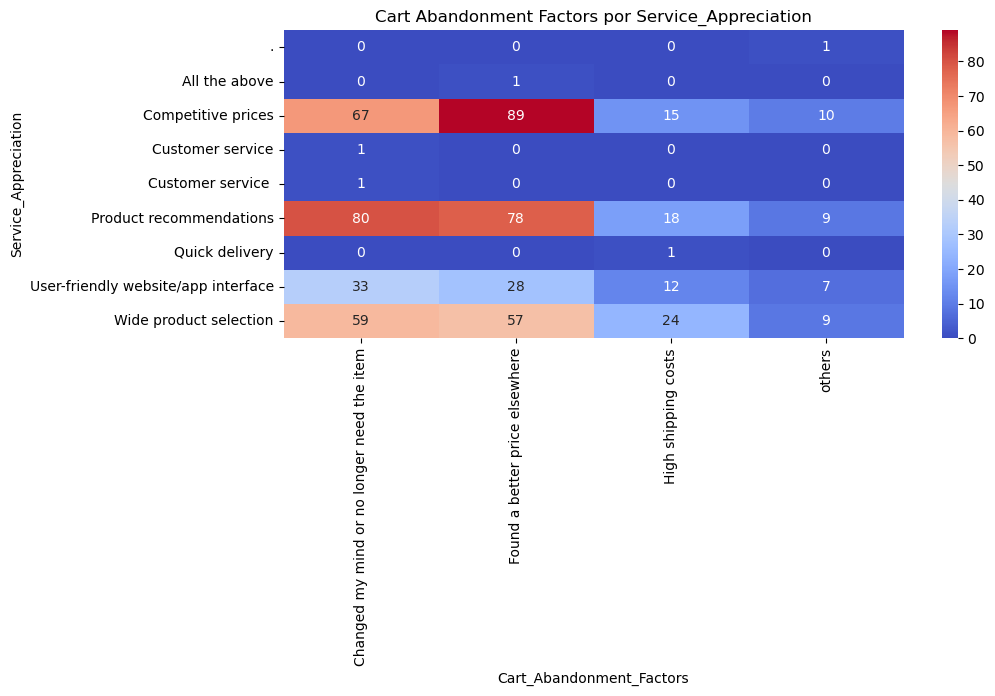

Chi-Square Statistic: 39.24983579484278
p-value: 0.025704828455804622
Degrees of Freedom: 24
Expected Frequencies Table:
[[4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [7.27016667e+01 7.63216667e+01 2.11166667e+01 1.08600000e+01]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [7.43083333e+01 7.80083333e+01 2.15833333e+01 1.11000000e+01]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [3.21333333e+01 3.37333333e+01 9.33333333e+00 4.80000000e+00]
 [5.98483333e+01 6.28283333e+01 1.73833333e+01 8.94000000e+00]]

Conclusion: Como p_value (0.0257) es menor a alpha de 0.05, rechazamos la H0(hipotesis nula)

Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Service_Appreciation y  Cart_Abandonment_Factors
-----------------------

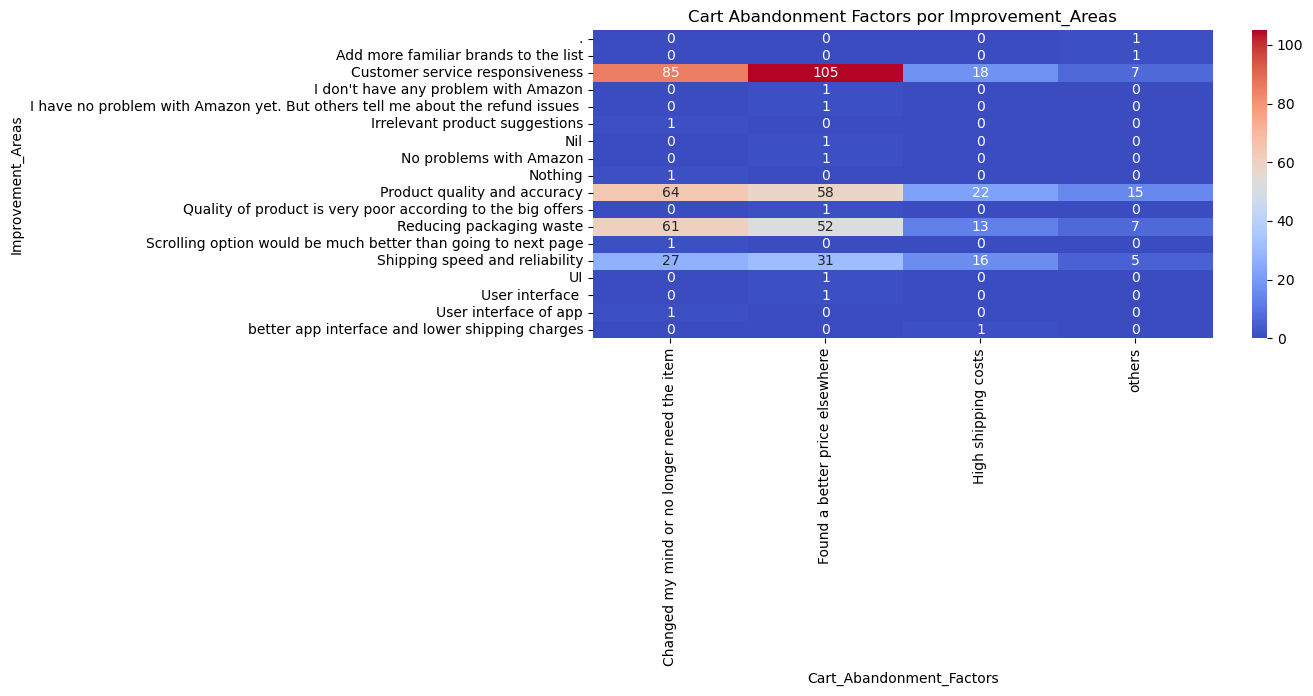

Chi-Square Statistic: 74.21334614342916
p-value: 0.018564472497371767
Degrees of Freedom: 51
Expected Frequencies Table:
[[4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [8.63583333e+01 9.06583333e+01 2.50833333e+01 1.29000000e+01]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [6.38650000e+01 6.70450000e+01 1.85500000e+01 9.54000000e+00]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [5.34216667e+01 5.60816667e+01 1.55166667e+01 7.98000000e+00]
 [4.01666667e-01 4.21666667e-01 1.16666667e-01 6.00000000e-02]
 [3.17316667e+01 3.33116667e+01 9.21666667e+00 4.74000000e+0

['Browsing_Frequency',
 'Product_Search_Method',
 'Search_Result_Exploration',
 'Cart_Completion_Frequency',
 'Saveforlater_Frequency',
 'Review_Left',
 'Review_Reliability',
 'Review_Helpfulness',
 'Recommendation_Helpfulness',
 'Service_Appreciation',
 'Improvement_Areas']

In [269]:
from scipy.stats import chi2_contingency



# Realizamos una funcion para realizar la pureba chi cuadrada de cada variable vs factores de abandono de carrito
def analyze_cart_abandonment(df, cart_abandonment_col, exclude_col=None):
 
    # Seleccionamos solo las variables categoricas (object, category, or bool types)
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    # Removemos la columna de abandono de carrito
    categorical_columns = [col for col in categorical_columns if col != cart_abandonment_col and col != exclude_col]
    
    if not categorical_columns:
        print("No categorical columns found in the DataFrame.")
        return
    
    rejected_columns = []

    for col in categorical_columns:
        print(f"\nAnalisis '{col}' vs '{cart_abandonment_col}':")
        
        # Creacion de tabla de contingenca
        cross_tab = pd.crosstab(df[col], df[cart_abandonment_col])
        print("Cross-Tabulation Table:")
        print(cross_tab)
        
        # Visualize de tabla de contingencia
        plt.figure(figsize=(10, 4))
        sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
        plt.title(f'Cart Abandonment Factors por {col}')
        plt.show()
        
        #  Chi-Square test
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print(f"Chi-Square Statistic: {chi2}")
        print(f"p-value: {p}")
        print(f"Degrees of Freedom: {dof}")
        print("Expected Frequencies Table:")
        print(expected)
        print()

        alpha = .05
        if p < alpha:
            print(f'Conclusion: Como p_value ({p:.4f}) es menor a alpha de {alpha}, rechazamos la H0(hipotesis nula)')
            print()

            print(f'Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre {col} y  Cart_Abandonment_Factors')
            rejected_columns.append(col)
        else:
            print(f'Conclusion: Como p_value  ({p:.4f}) es mayor a alpha de {alpha}, no hay suficiente evidencia para rechazar  H0(hipotesis nula)')
            print()

            print(f'Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre {col} y  Cart_Abandonment_Factors')


        print("-" * 50)
    
    return rejected_columns


analyze_cart_abandonment(df, 'Cart_Abandonment_Factors', exclude_col='Purchase_Categories') 

Cross-Tabulation Table:
Cart_Abandonment_Factors    Changed my mind or no longer need the item  \
Purchase_Categories                                                      
Beauty and Personal Care                                           119   
Clothing and Fashion                                               143   
Groceries and Gourmet Food                                          52   
Home and Kitchen                                                    95   
others                                                              63   

Cart_Abandonment_Factors    Found a better price elsewhere  \
Purchase_Categories                                          
Beauty and Personal Care                               144   
Clothing and Fashion                                   139   
Groceries and Gourmet Food                              41   
Home and Kitchen                                        89   
others                                                  70   

Cart_Abandonment_Facto

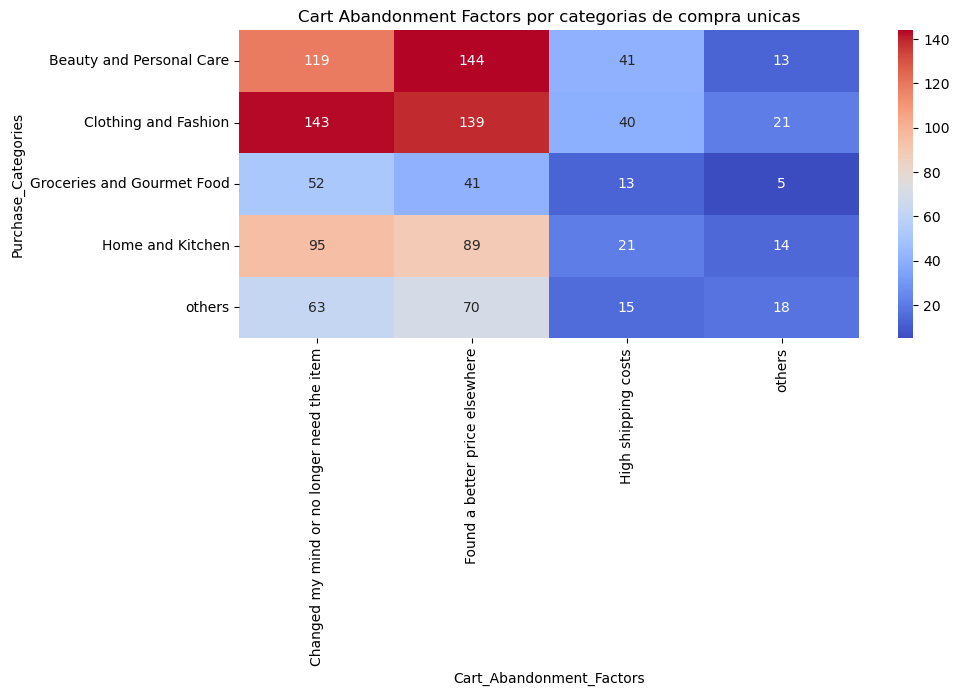

Chi-Square Statistic: 15.171438006675501
p-value: 0.2321946390786752
Degrees of Freedom: 12
Expected Frequencies Table:
[[129.43252595 132.44896194  35.64878893  19.46972318]
 [140.04844291 143.31228374  38.57266436  21.066609  ]
 [ 45.32179931  46.37802768  12.48269896   6.81747405]
 [ 89.41868512  91.50259516  24.62802768  13.45069204]
 [ 67.77854671  69.35813149  18.66782007  10.19550173]]

Conclusion: Como p_value  (0.2322) es mayor a alpha de 0.05, no hay suficiente evidencia para rechazar  H0(hipotesis nula)

Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre Purchase categories y  Cart_Abandonment_Factors
--------------------------------------------------


In [270]:
# Creacion de tabla de contingenca para test de categorias de compra unicas y factores de abandono de carrito
cross_tab = pd.crosstab(df_copy['Purchase_Categories'], df_copy['Cart_Abandonment_Factors'])
print("Cross-Tabulation Table:")
print(cross_tab)

# Visualize de tabla de contingencia
plt.figure(figsize=(10, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')
plt.title(f'Cart Abandonment Factors por categorias de compra unicas')
plt.show()

#  Chi-Square test
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)
print()

alpha = .05
if p < alpha:
    print(f'Conclusion: Como p_value ({p:.4f}) es menor a alpha de {alpha}, rechazamos la H0(hipotesis nula)')
    print()

    print(f'Por lo tanto hay diferencias significativas entre los grupos, es decir que hay evidencia estadistica para decir que existe una asociacion entre Purchase categories y  Cart_Abandonment_Factors')
    
else:
    print(f'Conclusion: Como p_value  ({p:.4f}) es mayor a alpha de {alpha}, no hay suficiente evidencia para rechazar  H0(hipotesis nula)')
    print()

    print(f'Por lo tanto no hay diferencias significativas entre los grupos, es decir que NO hay evidencia estadistica para decir que existe una asociacion entre Purchase categories y  Cart_Abandonment_Factors')


print("-" * 50)

### Conclusiones por categoria

`Browsing_Frequency`

- Se puede concluir que existe una relación entre la frecuencia de navegación y los factores de abandono de carrito, ya que los usuarios que se conectan algunas veces a la semana y encuentran mejores precios en otros sitios son quienes abandonan más el carrito.


`Product_Search_Method`
- Se puede concluir que existe una relación entre el método de búsqueda de producto y los factores de abandono de carrito, ya que los usuarios que buscan por categoría y cambian de opinión o ya no necesitan el artículo son quienes más abandonan el carrito.  Dime cuantas veces por se repite que la conclusion es una de estas cuatro , cambio de opinion y/o ya no necesia el articulo, encontrpo mejor precio en otro lugar, altos costos de envio, otros 


`Search_Result_Exploration`
Se puede concluir que existe una relación entre la exploración de resultados de búsqueda y los factores de abandono de carrito, ya que los usuarios que navegaron en múltiples páginas y encontraron un mejor precio en otro lugar son quienes más abandonan el carrito.

`Cart_Completion_Frequency`
- Se puede concluir que existe una relación entre la frecuencia con la que se completa el carrito y los factores de abandono de carrito, ya que los usuarios que seguido completan el carrito y que encuentran un precio en un mejor lugar son los que más abandonan.

`Saveforlater_Frequency`
- Se puede concluir que existe una relación entre el uso de la función "guardar para más tarde" y los factores de abandono de carrito, ya que los usuarios que a veces usan la función "guardar para más tarde" y que encuentran un precio en un mejor lugar son los que más abandonan.

`Review_Reliability`
- Se puede concluir que existe una relación entre la confianza en las reseñas de producto y los factores de abandono de carrito, ya que los usuarios que ocasionalmente confían en la reseña de producto y encuentran un precio en otro lugar son los que más abandonan.

`Review_Helpfulness`
- Se puede concluir que existe una relación entre la utilidad de la información de las reseñas de producto y los factores de abandono de carrito, ya que los usuarios que a veces encontraban utilidad en la información de las reseñas y cambiaban de opinión o ya no necesitaban el artículo son los que más abandonan.

`Recommendation_Helpfulness`
- Se puede concluir que existe una relación entre la utilidad de las recomendaciones y los factores de abandono de carrito, ya que los usuarios que hallaban las recomendaciones útiles y abandonaban por altos costos de envío son los que más abandonaban. Después de ahí, los que más abandonan son los que no habían encontrado las recomendaciones útiles y cambiaban de opinión o ya no necesitaban el artículo.

`Service_Appreciation`
- Se puede concluir que existe una relación entre el aspecto del servicio de Amazon que más apreciaban y los factores de abandono de carrito, ya que los usuarios que apreciaban el precio competitivo y encontraban un mejor precio en otro lugar son los que más abandonaban. Los segundos que más abandonan son los que apreciaban las recomendaciones de productos y abandonaban ya sea porque cambiaban de opinión y ya no necesitaban el artículo o porque encontraron un mejor precio en otro lugar.

`Improvement_Areas`
- Se puede concluir que existe una relación entre las áreas que se creen que deben mejorar y los factores de abandono de carrito, ya que los usuarios que creían que Amazon tenía que mejorar su servicio en respuesta de servicio al cliente abandonaban ya sea porque cambiaban de opinión y ya no necesitaban el artículo o porque encontraron un mejor precio en otro lugar.

### Conclusion general variables categoricas

Se puede observar en que pruebas se ve cual fue la categoria de abandono mas frecuente

Cambio de opinión y/o ya no necesitaba el artículo → 4 veces

- Product_Search_Method
- Review_Helpfulness
- Recommendation_Helpfulness
- Service_Appreciation

Encontró mejor precio en otro lugar → 6 veces

- Browsing_Frequency
- Search_Result_Exploration
- Cart_Completion_Frequency
- Saveforlater_Frequency
- Review_Reliability
- Service_Appreciation

Altos costos de envío → 1 vez

- Recommendation_Helpfulness




En conclusión podemos decir que lo que más impacta para el abandono del carrito es que los usarios encuentran mejor precio en otro lugar, seguido de que cambiaron de opinion o ya no necesitan el articulo

## Analisis variables numericas

En esta sección analizaremos las variables numéricas que se tienen en el dataset para tener una destadística descriptiva de la recolección de datos

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Customer_Reviews_Importance'}>],
       [<Axes: title={'center': 'Personalized_Recommendation_Frequency_2'}>,
        <Axes: title={'center': 'Rating_Accuracy'}>],
       [<Axes: title={'center': 'Shopping_Satisfaction'}>, <Axes: >]],
      dtype=object)

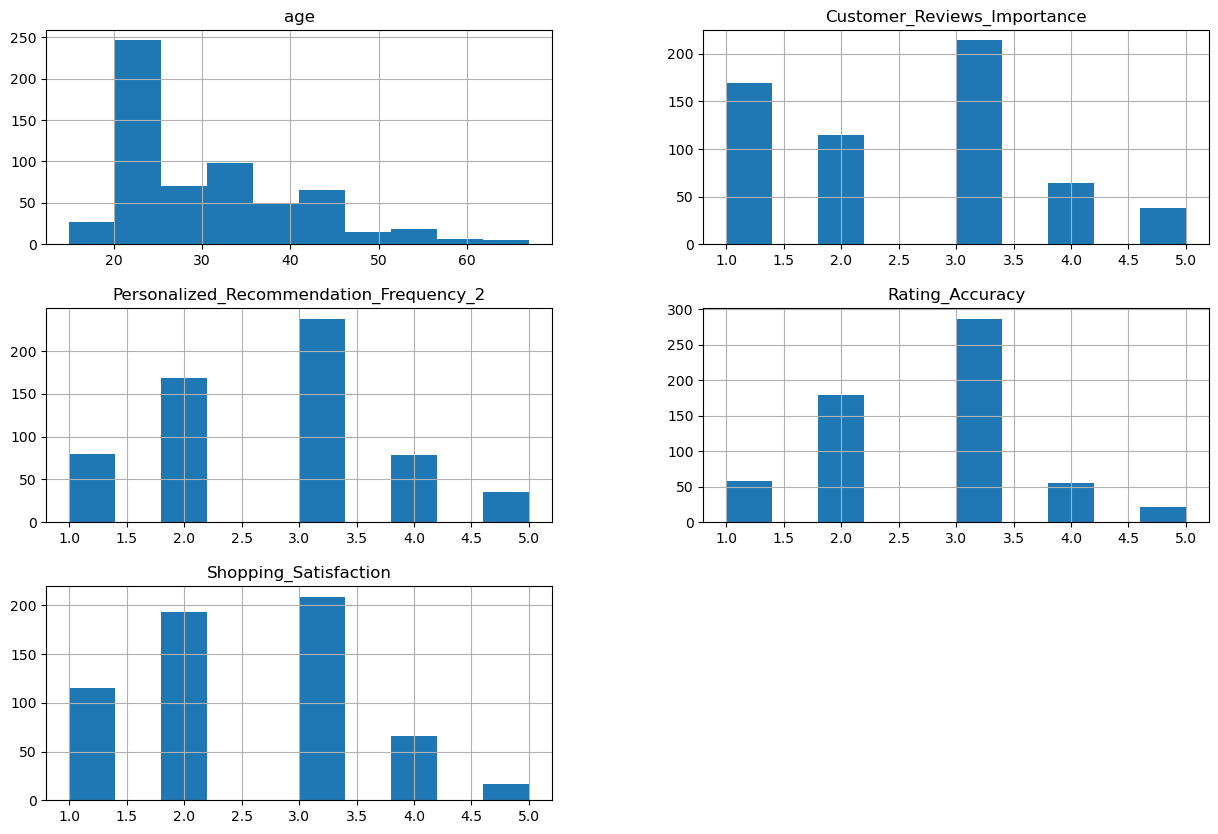

In [271]:
# Obtenemos histogramas de las estadisticas numericas generales
columnas_numericas =  df.columns.drop(['Timestamp','id'])

df[columnas_numericas].hist(figsize=(15, 10))

Se obtiene los histogramas de las variables numericas en donde se puede ver que salen practicament de esta forma porque en la preguntas las opciones van del 1 al 5(a excepcion de edad) por ende los histogramas no obtienen una distribucion normal del todo o algun tipo de trend

In [272]:
columnas_numericas =  df.drop(columns=['Timestamp','id'])

columnas_numericas = columnas_numericas.select_dtypes(include=['float64', 'int64'])

print(columnas_numericas.columns)

Index(['age', 'Customer_Reviews_Importance',
       'Personalized_Recommendation_Frequency_2', 'Rating_Accuracy',
       'Shopping_Satisfaction'],
      dtype='object')


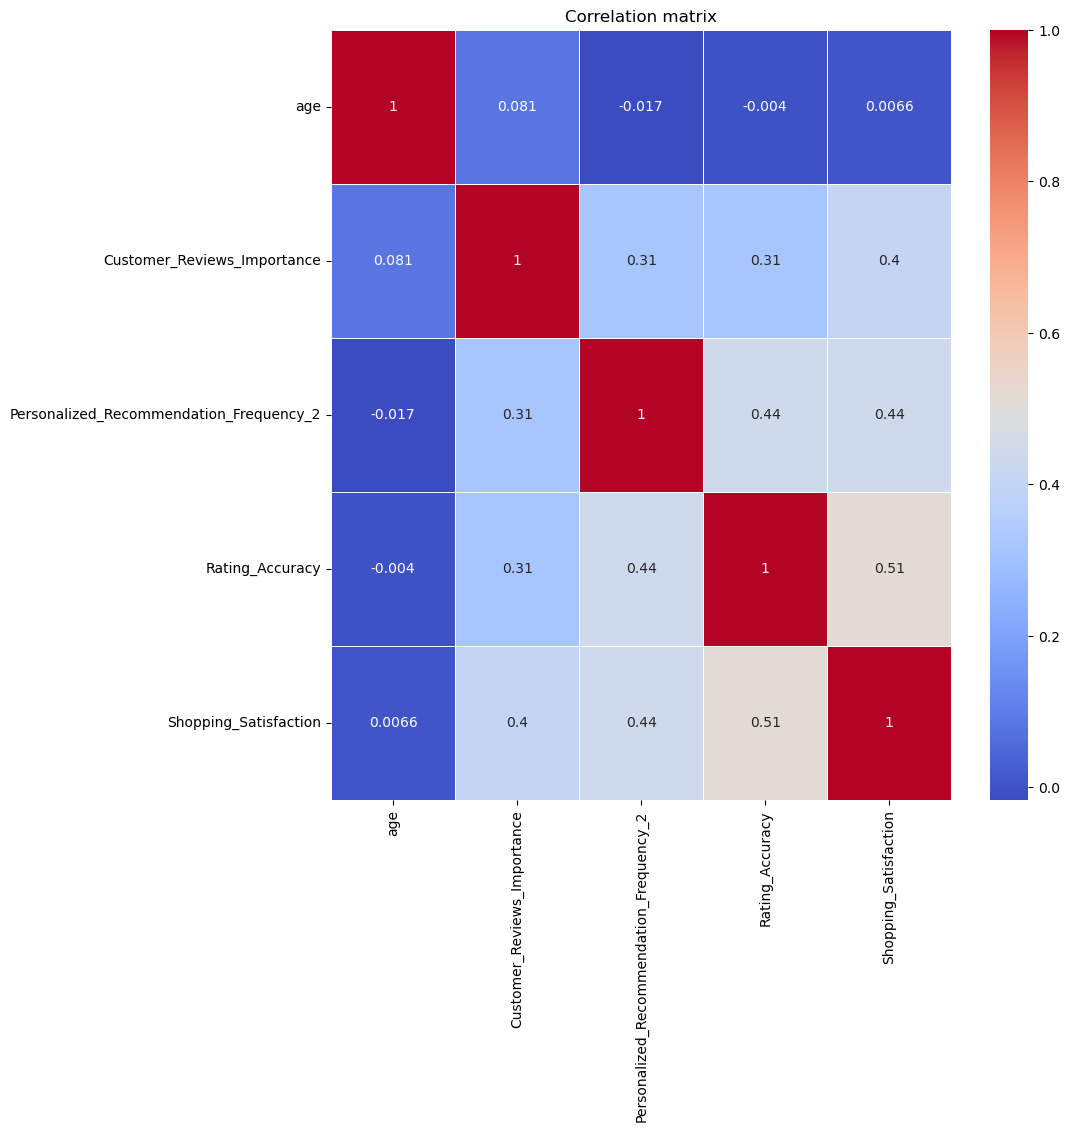

In [273]:
correlation = columnas_numericas.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [274]:
correlation_shopping_rating = df['Shopping_Satisfaction'].corr(df['Rating_Accuracy'])

print(correlation_shopping_rating)

0.5125676644834237


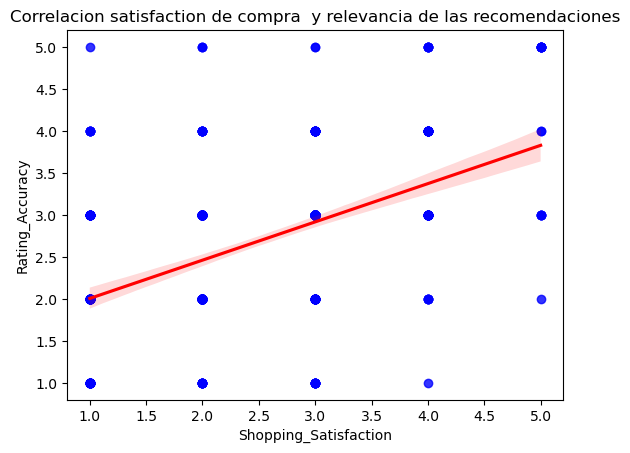

    Shopping_Satisfaction  Rating_Accuracy  count
0                       1                1     37
1                       1                2     47
2                       1                3     24
3                       1                4      6
4                       1                5      1
5                       2                1     10
6                       2                2     92
7                       2                3     79
8                       2                4      9
9                       2                5      3
10                      3                1     10
11                      3                2     34
12                      3                3    145
13                      3                4     18
14                      3                5      2
15                      4                1      1
16                      4                2      5
17                      4                3     34
18                      4                4     20


In [275]:
sns.regplot(x='Shopping_Satisfaction', y='Rating_Accuracy', data=df, scatter_kws = {'color':'blue'}, line_kws={'color' : 'red'})

plt.title('Correlacion satisfaction de compra  y relevancia de las recomendaciones')
plt.show()

group = df.groupby(['Shopping_Satisfaction', 'Rating_Accuracy']).size().reset_index(name='count')
print(group)

A pesar de que hay una correlacion de ..51 entre la satisfaccion de compra y la precision de las recomendaciones dadas se puede ver que esta correlacion al graficarrla no hay un patron muy claro pues recoredemos que al ser las opciones del 1-5 en cada categoria hace que se vea asi

# Analisis objetivo: Factores abandono de carrito

En esta sección, analizaremos la categoría o columna objetivo de los factores de abandono de carrito frente a los valores numéricos, con el fin de determinar si existe alguna diferencia entre un factor de abandono y ciertas categorías numéricas.

In [276]:
# Imprimimos los factores unicos de abandono 

print(df['Cart_Abandonment_Factors'].unique())

['Found a better price elsewhere' 'High shipping costs'
 'Changed my mind or no longer need the item' 'others']


Cart_Abandonment_Factors
Found a better price elsewhere                42.166667
Changed my mind or no longer need the item    40.166667
High shipping costs                           11.666667
others                                         6.000000
Name: proportion, dtype: float64


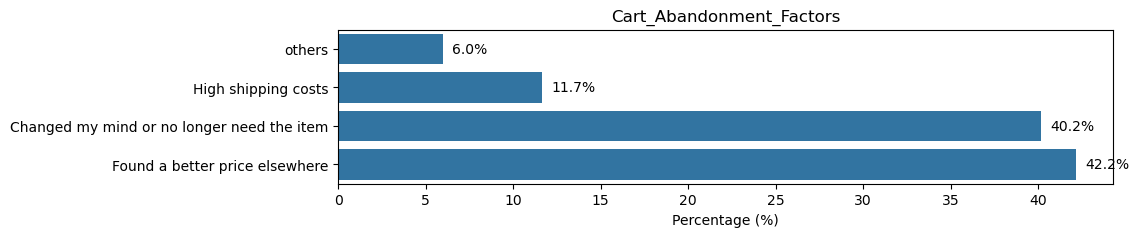

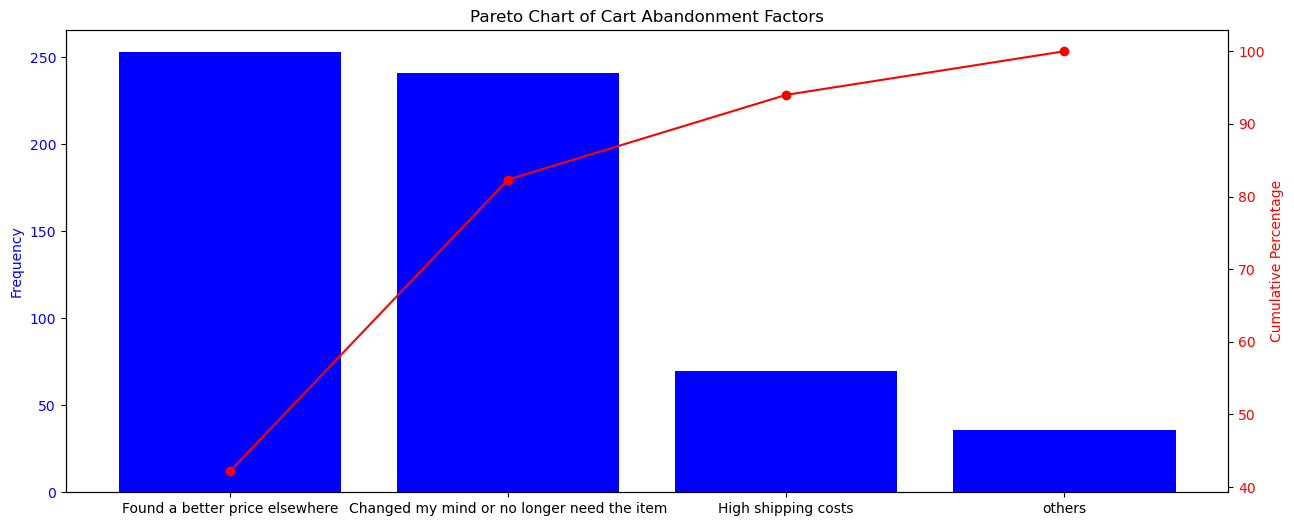

In [277]:
# Grafica de distribucion de factores de abandono
factor_counts = df['Cart_Abandonment_Factors'].value_counts()

# Factores de abandono 
factor_counts = factor_counts.sort_values(ascending=False)

percentage_per_value = df['Cart_Abandonment_Factors'].value_counts(normalize=True) * 100

print(percentage_per_value)


value_counts = df['Cart_Abandonment_Factors'].value_counts(normalize=True) * 100
value_counts = value_counts.sort_values(ascending=True)  
        
        
plt.figure(figsize=(10, len(value_counts) / 2))
sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
plt.title(f'Cart_Abandonment_Factors')
plt.xlabel('Percentage (%)')
plt.ylabel(None)
      

# Pareto chart para ver cuales son los factores de abandono que mas contribuyen 
      
for i, v in enumerate(value_counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center')
        

plt.show()

# Valores acumulados
cumulative_percentage = np.cumsum(factor_counts) / np.sum(factor_counts) * 100


#  Pareto chart
fig, ax1 = plt.subplots(figsize=(15,6))

# Barra frecuencias
ax1.bar(factor_counts.index, factor_counts, color='b')
ax1.set_xlabel(None)
ax1.set_ylabel('Frequency', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line para el acumulado
ax2 = ax1.twinx()
ax2.plot(factor_counts.index, cumulative_percentage, color='r', marker='o')
ax2.set_ylabel('Cumulative Percentage', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.xticks(rotation=45, ha='right')

plt.title('Pareto Chart of Cart Abandonment Factors')
plt.show()

En el primer gráfico de barras los factores de abandono de carrito podemos ver que los que mas sobresalen son que se encontró un mejor precio con un 42% y que mejor se cambia de opinión o ya no necesita mas el articulo con un 40% mientras que los otras dos categorías como la de alto costo de envío y otros representan el 11% y 5% respectivamente.

Después de eso se hace un pareto para saber cuales son los principales factores que se tendrían que analizar, que en este caso serian `Se encontró un mejor precio en otro lugar` y `Se cambió de opinión o no necesita más el artículo` pues son las que más efectos tienen al abandono

### T-test para las medias factores principales de abandono('Se encontro un mejor precio en otro lugar vs se cambio de opinion o ya no necesita el articulo') y variables numericas

Se hace un boxplot junto con un t-test de las medias de esas dos categorias de la variable factores de abandono de carrito vs las variables numericas para ver si hay diferencias siginificativas entre 'Se encuentra precio en un mejor lugar' y 'Cambio de opinion o ya no necesita el articulo'

Cart_Abandonment_Factors: Found a better price elsewhere
count    253.000000
mean      30.529644
std        9.950079
min       16.000000
25%       23.000000
50%       25.000000
75%       36.000000
max       63.000000
Name: age, dtype: float64
Cart_Abandonment_Factors: Changed my mind or no longer need the item
count    241.000000
mean      31.506224
std       10.183369
min       16.000000
25%       23.000000
50%       29.000000
75%       36.000000
max       67.000000
Name: age, dtype: float64


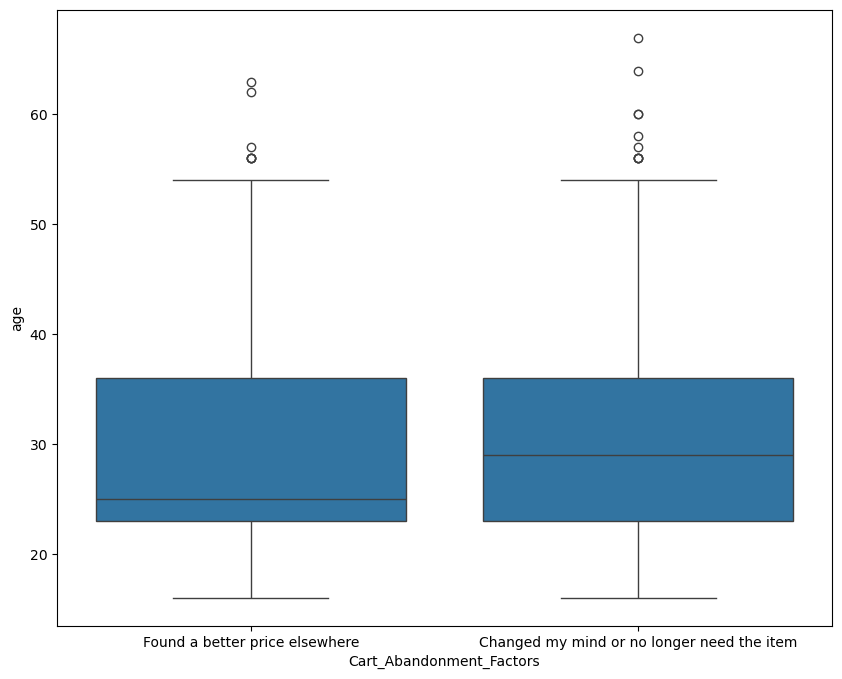


Levene's test statistic: 0.30012512134853814
p-value 0.5840524403313538
No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes

Valor p: 0.2815623084138923
NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos


In [278]:
# Hacemo un box plot de los factores de abandono vs edad

categoria_abandono = ['Found a better price elsewhere','Changed my mind or no longer need the item']





for categoria in categoria_abandono:
    filtered_df = df[df['Cart_Abandonment_Factors'] == categoria]  # Filter DataFrame for the current console
    descripcion = filtered_df['age'].describe() 
    print(f"Cart_Abandonment_Factors: {categoria}")
    print(descripcion)




filtered_df = df[df['Cart_Abandonment_Factors'].isin(categoria_abandono)]


plt.figure(figsize=(10,8))
sns.boxplot(x = 'Cart_Abandonment_Factors', y = 'age', data=filtered_df)
plt.show()
print()
# Realizamos el levene test para confrimar que nestras varianzas sean iguales antes de hacer el ttest de medias

group1 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[0]]['age']
group2 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[1]]['age']

statistic, p_value = levene(group1, group2)
print("Levene's test statistic:", statistic)
print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Se rechaza la hipotesis nula, varianzas son significativamente diferentes')
else:
    print('No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes')

print()


alpha = 0.05

results = st.ttest_ind(group1, group2, equal_var=(p_value>=alpha))

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula, es decir que hay diferencias significativas entre los dos grupos')
else:
    print('NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos')

Para la variable edad, no existe una diferencia significativa entre los grupos "Se encontró un mejor precio en otro lugar" y "Se cambió de opinión o ya no se necesita el producto", pues no hay evidencia estadística de que la edad sea un factor para abandonar el carrito por alguna de estas dos categorías.

Cart_Abandonment_Factors: Found a better price elsewhere
count    253.000000
mean       2.422925
std        1.178085
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Customer_Reviews_Importance, dtype: float64
Cart_Abandonment_Factors: Changed my mind or no longer need the item
count    241.000000
mean       2.526971
std        1.068634
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Customer_Reviews_Importance, dtype: float64


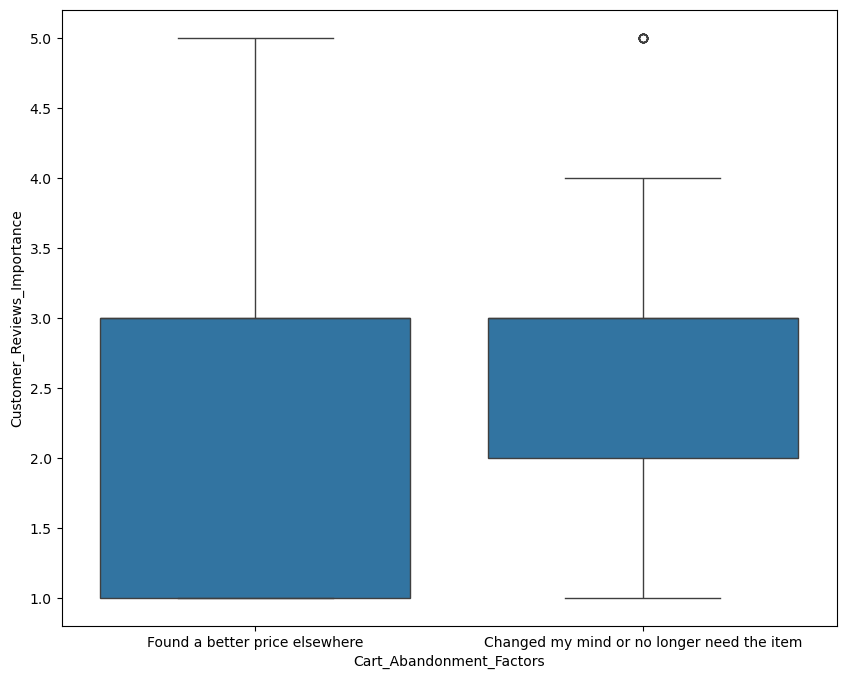


Levene's test statistic: 4.429621202417228
p-value 0.0358269265674919
Se rechaza la hipotesis nula, varianzas son significativamente diferentes

Valor p: 0.30399161471606906
NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos


In [279]:
#Factores de abandono vs importancia de resenas de cliente


categoria_abandono = ['Found a better price elsewhere','Changed my mind or no longer need the item']





for categoria in categoria_abandono:
    filtered_df = df[df['Cart_Abandonment_Factors'] == categoria]  # Filter DataFrame for the current console
    descripcion = filtered_df['Customer_Reviews_Importance'].describe() 
    print(f"Cart_Abandonment_Factors: {categoria}")
    print(descripcion)




filtered_df = df[df['Cart_Abandonment_Factors'].isin(categoria_abandono)]


plt.figure(figsize=(10,8))
sns.boxplot(x = 'Cart_Abandonment_Factors', y = 'Customer_Reviews_Importance', data=filtered_df)
plt.show()
print()
# Realizamos el levene test para confrimar que nestras varianzas sean iguales antes de hacer el ttest de medias

group1 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[0]]['Customer_Reviews_Importance']
group2 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[1]]['Customer_Reviews_Importance']

statistic, p_value = levene(group1, group2)
print("Levene's test statistic:", statistic)
print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Se rechaza la hipotesis nula, varianzas son significativamente diferentes')
    equal_var = False
else:
    print('No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes')
    equal_var = True

print()


alpha = 0.05

results = st.ttest_ind(group1, group2, equal_var=equal_var)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula, es decir que hay diferencias significativas entre los dos grupos')
else:
    print('NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos')


Para la variable importancia de las resenas del cliente, no existe una diferencia significativa entre los grupos "Se encontró un mejor precio en otro lugar" y "Se cambió de opinión o ya no se necesita el producto", pues no hay evidencia estadística de que la importancia de las resenas del cliente sea un factor para abandonar el carrito por alguna de estas dos categorías.

Cart_Abandonment_Factors: Found a better price elsewhere
count    253.000000
mean       2.644269
std        1.019617
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Personalized_Recommendation_Frequency_2, dtype: float64
Cart_Abandonment_Factors: Changed my mind or no longer need the item
count    241.000000
mean       2.717842
std        0.993339
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Personalized_Recommendation_Frequency_2, dtype: float64


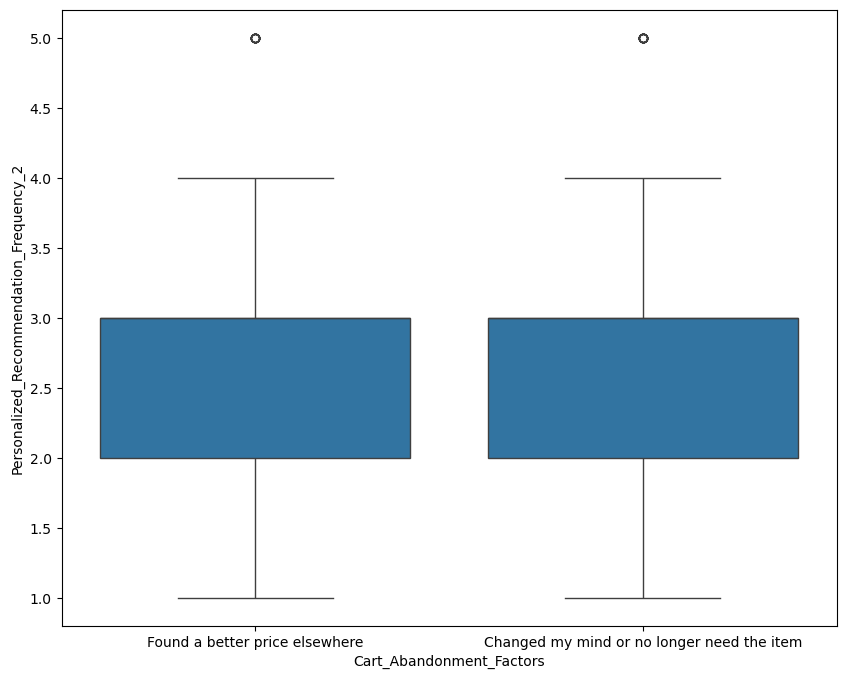


Levene's test statistic: 0.029657703376140723
p-value 0.8633400117218578
No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes

Valor p: 0.41730069516721413
NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos


In [280]:
#Factores de abandono vs Que tan seguido se recibe recomendaciones personalizadas


categoria_abandono = ['Found a better price elsewhere','Changed my mind or no longer need the item']





for categoria in categoria_abandono:
    filtered_df = df[df['Cart_Abandonment_Factors'] == categoria]  # Filter DataFrame for the current console
    descripcion = filtered_df['Personalized_Recommendation_Frequency_2'].describe() 
    print(f"Cart_Abandonment_Factors: {categoria}")
    print(descripcion)




filtered_df = df[df['Cart_Abandonment_Factors'].isin(categoria_abandono)]


plt.figure(figsize=(10,8))
sns.boxplot(x = 'Cart_Abandonment_Factors', y = 'Personalized_Recommendation_Frequency_2', data=filtered_df)
plt.show()
print()
# Realizamos el levene test para confrimar que nestras varianzas sean iguales antes de hacer el ttest de medias

group1 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[0]]['Personalized_Recommendation_Frequency_2']
group2 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[1]]['Personalized_Recommendation_Frequency_2']

statistic, p_value = levene(group1, group2)
print("Levene's test statistic:", statistic)
print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Se rechaza la hipotesis nula, varianzas son significativamente diferentes')
else:
    print('No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes')

print()


alpha = 0.05

results = st.ttest_ind(group1, group2, equal_var=(p_value>=alpha))

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula, es decir que hay diferencias significativas entre los dos grupos')
else:
    print('NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos')

Cart_Abandonment_Factors: Found a better price elsewhere
count    253.000000
mean       2.636364
std        0.837005
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Rating_Accuracy, dtype: float64
Cart_Abandonment_Factors: Changed my mind or no longer need the item
count    241.000000
mean       2.692946
std        0.859452
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Rating_Accuracy, dtype: float64


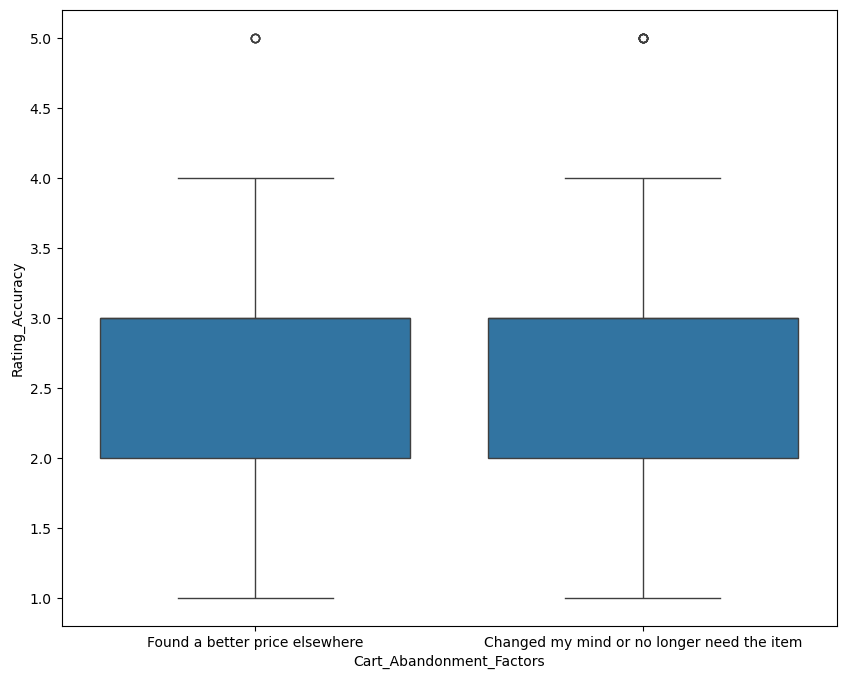


Levene's test statistic: 0.24389925221588035
p-value 0.6216243432119779
No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes

Valor p: 0.45888376653674356
NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos


In [281]:
#Factores de abandono vs Que tan seguido se recibe recomendaciones personalizadas


categoria_abandono = ['Found a better price elsewhere','Changed my mind or no longer need the item']





for categoria in categoria_abandono:
    filtered_df = df[df['Cart_Abandonment_Factors'] == categoria]  
    descripcion = filtered_df['Rating_Accuracy'].describe() 
    print(f"Cart_Abandonment_Factors: {categoria}")
    print(descripcion)




filtered_df = df[df['Cart_Abandonment_Factors'].isin(categoria_abandono)]


plt.figure(figsize=(10,8))
sns.boxplot(x = 'Cart_Abandonment_Factors', y = 'Rating_Accuracy', data=filtered_df)
plt.show()
print()
# Realizamos el levene test para confrimar que nestras varianzas sean iguales antes de hacer el ttest de medias

group1 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[0]]['Rating_Accuracy']
group2 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[1]]['Rating_Accuracy']

statistic, p_value = levene(group1, group2)
print("Levene's test statistic:", statistic)
print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Se rechaza la hipotesis nula, varianzas son significativamente diferentes')
else:
    print('No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes')

print()


alpha = 0.05

results = st.ttest_ind(group1, group2, equal_var=(p_value>=alpha))

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula, es decir que hay diferencias significativas entre los dos grupos')
else:
    print('NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos')

Para la variable relevancia y precision de las recomendaciones recibidas, no existe una diferencia significativa entre los grupos "Se encontró un mejor precio en otro lugar" y "Se cambió de opinión o ya no se necesita el producto", pues no hay evidencia estadística de que la relevancia y precision de las recomendaciones recibidas sea un factor para abandonar el carrito por alguna de estas dos categorías.

Cart_Abandonment_Factors: Found a better price elsewhere
count    253.000000
mean       2.391304
std        1.004476
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Shopping_Satisfaction, dtype: float64
Cart_Abandonment_Factors: Changed my mind or no longer need the item
count    241.000000
mean       2.423237
std        0.967880
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Shopping_Satisfaction, dtype: float64


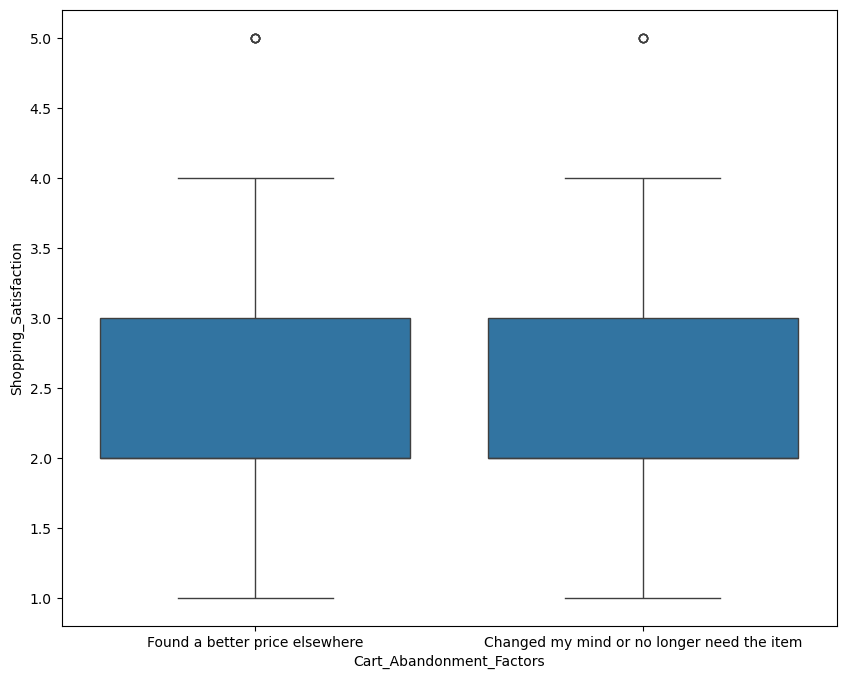


Levene's test statistic: 0.09513106671639589
p-value 0.7578832348782263
No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes

Valor p: 0.71937008823477
NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos


In [282]:
#Factores de abandono vs Satisfaction de la compra


categoria_abandono = ['Found a better price elsewhere','Changed my mind or no longer need the item']





for categoria in categoria_abandono:
    filtered_df = df[df['Cart_Abandonment_Factors'] == categoria]  
    descripcion = filtered_df['Shopping_Satisfaction'].describe() 
    print(f"Cart_Abandonment_Factors: {categoria}")
    print(descripcion)




filtered_df = df[df['Cart_Abandonment_Factors'].isin(categoria_abandono)]


plt.figure(figsize=(10,8))
sns.boxplot(x = 'Cart_Abandonment_Factors', y = 'Shopping_Satisfaction', data=filtered_df)
plt.show()
print()
# Realizamos el levene test para confrimar que nestras varianzas sean iguales antes de hacer el ttest de medias

group1 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[0]]['Shopping_Satisfaction']
group2 =  df[df['Cart_Abandonment_Factors'] == categoria_abandono[1]]['Shopping_Satisfaction']

statistic, p_value = levene(group1, group2)
print("Levene's test statistic:", statistic)
print('p-value', p_value)


alpha = 0.05

if p_value < alpha:
    print('Se rechaza la hipotesis nula, varianzas son significativamente diferentes')
else:
    print('No se puede rechazar la hipotesis nula, varianzas no son significativamente diferenrtes')

print()


alpha = 0.05

results = st.ttest_ind(group1, group2, equal_var=(p_value>=alpha))

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula, es decir que hay diferencias significativas entre los dos grupos')
else:
    print('NO hay suficiente evidencia para rechazar la hipotesis nula, es decir que NO hay diferencias significativas entre los dos grupos')

Para la variable Satisfacion de comptra, no existe una diferencia significativa entre los grupos "Se encontró un mejor precio en otro lugar" y "Se cambió de opinión o ya no se necesita el producto", pues no hay evidencia estadística de que variable Satisfacion de comptra sea un factor para abandonar el carrito por alguna de estas dos categorías.

# Conclusiones

En conclusión, los factores que más destacan son que el cliente encuentra un mejor precio en otro lugar o que ya no necesita el artículo o cambia de opinión. Este abandono es dado primordialmente por las recomendaciones que se le dan al usuario y por la frecuencia de uso de las herramientas relacionadas, como lo son la función "guardar para más tarde", la frecuencia de completado del carrito y la forma de búsqueda (aquí la gente tiende a usar muchas páginas en lugar de una para la busqueda). Es así que las propuestas que se tienen son:

- Mejorar el algoritmo de recomendaciones de acuerdo a las actividades del usuario para que sean más personalizadas.

- Mejorar la interfaz para que sea más amigable en las funciones de completado de carrito, "guardar para más tarde", y agregar recordatorios de lo agregado o de lo abandonado.

- Hacer ofertas entre lo que busque el usuario y las recomendaciones que aparezcan en la página (algún tipo de paquete o combo), como agregar un producto complementario en el carrito.

- Ofrecer descuentos o cupones para usuarios frecuentes.

- Crear un sistema de recompensa por compras recurrentes, como lo puede ser puntos canjeables.

- Herramienta que permita comparar precios de productos similares directamente en Amazon.
